In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eispac
import astropy.units as u
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D
from specutils.manipulation import SplineInterpolatedResampler
import h5py
from juanfit import SpectrumFitSingle

In [2]:
with h5py.File("../../sav/EIS/EQSPY/Atlas30_tiltcorr_crop.h5", 'r') as hf:
    data_cube_0 = hf["data_cube_0"][:]
    err_cube_0 = hf["err_cube_0"][:]
    wvl_cube_0 = hf["wvl_cube_0"][:]

    data_cube_1 = hf["data_cube_1"][:]
    err_cube_1 = hf["err_cube_1"][:]
    wvl_cube_1 = hf["wvl_cube_1"][:]

    data_cube_2 = hf["data_cube_2"][:]
    err_cube_2 = hf["err_cube_2"][:]
    wvl_cube_2 = hf["wvl_cube_2"][:]

    data_cube_3 = hf["data_cube_3"][:]
    err_cube_3 = hf["err_cube_3"][:]
    wvl_cube_3 = hf["wvl_cube_3"][:]

    ccd_offset_0 = hf["ccd_offset_0"][:]
    ccd_offset_1 = hf["ccd_offset_1"][:]
    ccd_offset_2 = hf["ccd_offset_2"][:]
    ccd_offset_3 = hf["ccd_offset_3"][:]
    fexii_195_bottom_left = hf["fexii_195_bottom_left"][:]
    slit_width = hf["slit_width"][:]

In [3]:
slit_width_aver = np.mean(slit_width)

In [4]:
ccd_offset_FeXII = ccd_offset_1[263]

In [5]:
data_cube_0.shape

(160, 16, 1024)

In [6]:
fexii_195_bottom_left

array([-931.76660824,  312.38156128])

In [7]:
ccd_offset_0

array([18.482306, 18.480537, 18.47877 , ..., 16.678743, 16.67698 ,
       16.675213], dtype=float32)

In [8]:
def return_mask(ccd_offset, ccd_offset_FeXII, FeXII_bl):
    xcoord = np.linspace(0,30,16) + FeXII_bl[0]
    ycoord = np.linspace(0,159,160) + FeXII_bl[1] + ccd_offset_FeXII - ccd_offset
    y_grid, x_grid = np.meshgrid(ycoord,xcoord,indexing="ij")
    height_grid = np.sqrt(y_grid**2 + x_grid**2)/950

    mask_1 = np.where((height_grid >= 1.035) & (height_grid < 1.06))
    mask_2 = np.where((height_grid >= 1.06) & (height_grid < 1.1))

    return mask_1, mask_2

In [9]:
FeXI_FeX_182_slice = slice(695,725)
FeXI_FeX_182_wvl = wvl_cube_0[FeXI_FeX_182_slice]

FeXI_FeX_182_region_1, FeXI_FeX_182_region_2 = return_mask(np.mean(ccd_offset_0[FeXI_FeX_182_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXI_FeX_182_data_region_1 = data_cube_0[FeXI_FeX_182_region_1[0],FeXI_FeX_182_region_1[1],FeXI_FeX_182_slice]
FeXI_FeX_182_data_region_2 = data_cube_0[FeXI_FeX_182_region_2[0],FeXI_FeX_182_region_2[1],FeXI_FeX_182_slice]
FeXI_FeX_182_err_region_1 = err_cube_0[FeXI_FeX_182_region_1[0],FeXI_FeX_182_region_1[1],FeXI_FeX_182_slice]
FeXI_FeX_182_err_region_2 = err_cube_0[FeXI_FeX_182_region_2[0],FeXI_FeX_182_region_2[1],FeXI_FeX_182_slice]

FeXI_FeX_182_data_aver_r1 = np.nanmean(FeXI_FeX_182_data_region_1, axis=0)
FeXI_FeX_182_data_aver_r2 = np.nanmean(FeXI_FeX_182_data_region_2, axis=0)
FeXI_FeX_182_data_aver_all = np.nanmean(data_cube_0[:,:,FeXI_FeX_182_slice], axis=(0,1))

FeXI_FeX_182_err_aver_r1 = np.sqrt(np.nanmean(FeXI_FeX_182_err_region_1**2,axis=0))/np.sqrt(FeXI_FeX_182_err_region_1.shape[0])
FeXI_FeX_182_err_aver_r2 = np.sqrt(np.nanmean(FeXI_FeX_182_err_region_2**2,axis=0))/np.sqrt(FeXI_FeX_182_err_region_2.shape[0])
FeXI_FeX_182_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXI_FeX_182_slice]**2,axis=(0,1)))/np.sqrt(160*16)

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xi} 182 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.06]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

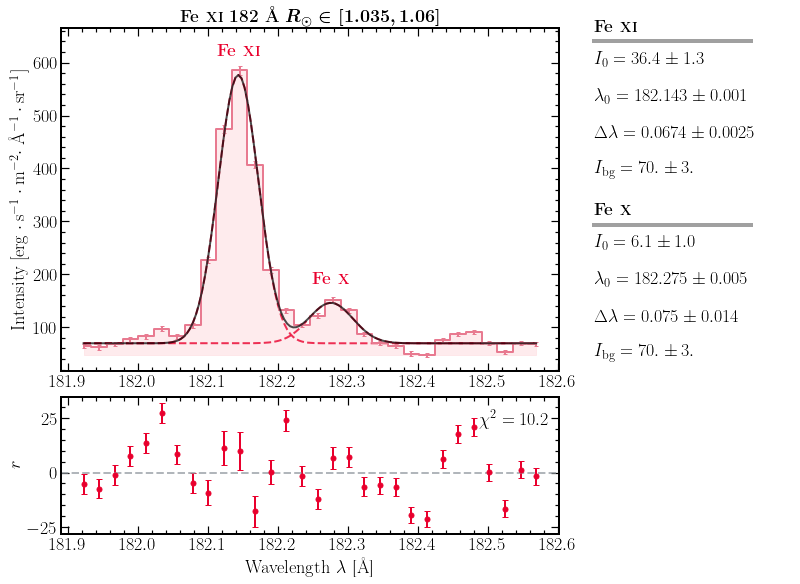

In [10]:
FeXI_FeX_182_fitmodel_r1 = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_r1, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_r1,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_r1.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xi} 182 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xi} 182 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.06,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

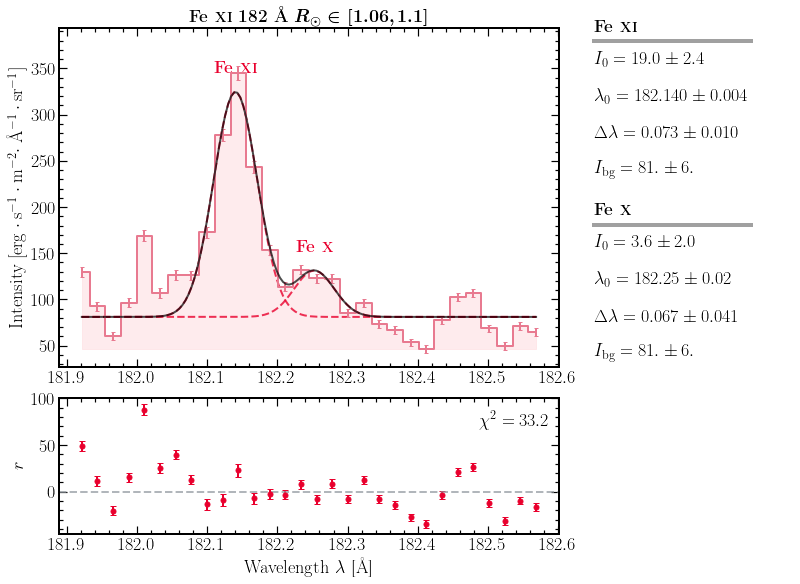

In [11]:
FeXI_FeX_182_fitmodel_r2 = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_r2, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_r2,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_r2.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xi} 182 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xi} 182 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

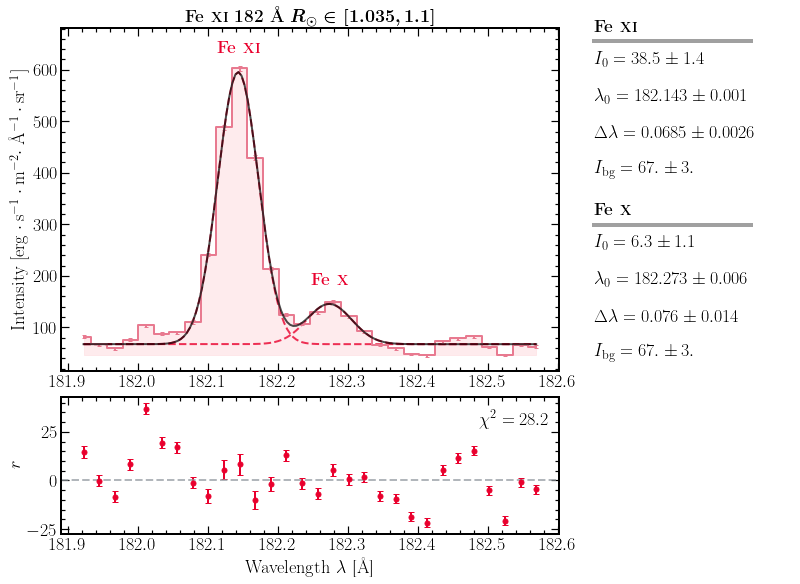

In [12]:
FeXI_FeX_182_fitmodel_all = SpectrumFitSingle(data=FeXI_FeX_182_data_aver_all, wvl=FeXI_FeX_182_wvl,err=FeXI_FeX_182_err_aver_all,
                                        line_number=2,same_width=False,line_wvl_init=[182.15,182.3],int_max_init=[200,100],fwhm_init=[0.07,0.07],)
FeXI_FeX_182_fitmodel_all.run_lse(absolute_sigma=False)
FeXI_FeX_182_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xi} 182 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{x}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

In [13]:
FeX_184_slice = slice(800,820)
FeX_184_wvl = wvl_cube_0[FeX_184_slice]

FeX_184_region_1, FeX_184_region_2 = return_mask(np.mean(ccd_offset_0[FeX_184_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeX_184_data_region_1 = data_cube_0[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_data_region_2 = data_cube_0[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]
FeX_184_err_region_1 = err_cube_0[FeX_184_region_1[0],FeX_184_region_1[1],FeX_184_slice]
FeX_184_err_region_2 = err_cube_0[FeX_184_region_2[0],FeX_184_region_2[1],FeX_184_slice]

FeX_184_data_aver_r1 = np.nanmean(FeX_184_data_region_1, axis=0)
FeX_184_data_aver_r2 = np.nanmean(FeX_184_data_region_2, axis=0)
FeX_184_data_aver_all = np.nanmean(data_cube_0[:,:,FeX_184_slice], axis=(0,1))

FeX_184_err_aver_r1 = np.sqrt(np.nanmean(FeX_184_err_region_1**2,axis=0))/np.sqrt(FeX_184_err_region_1.shape[0])
FeX_184_err_aver_r2 = np.sqrt(np.nanmean(FeX_184_err_region_2**2,axis=0))/np.sqrt(FeX_184_err_region_2.shape[0])
FeX_184_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeX_184_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 25.9 mÅ


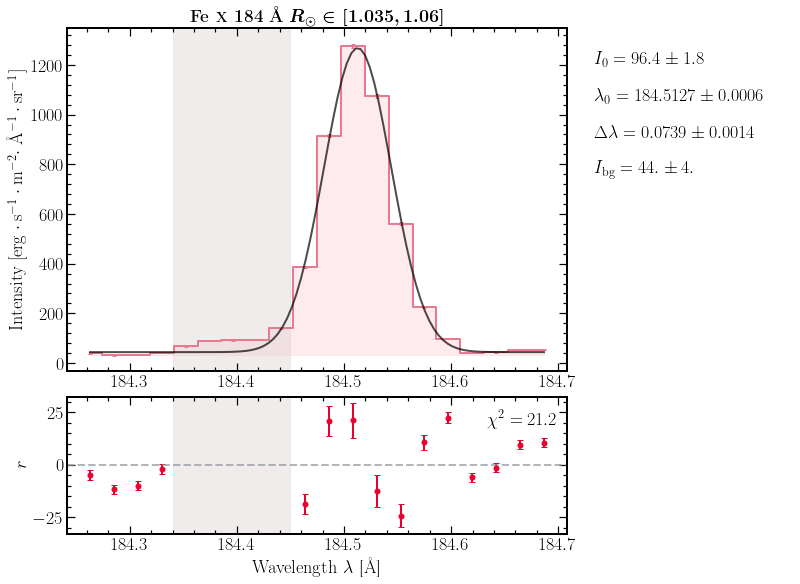

In [14]:
FeX_184_fitmodel_r1 = SpectrumFitSingle(data=FeX_184_data_aver_r1, wvl=FeX_184_wvl,err=FeX_184_err_aver_r1,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r1.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 25.5 mÅ


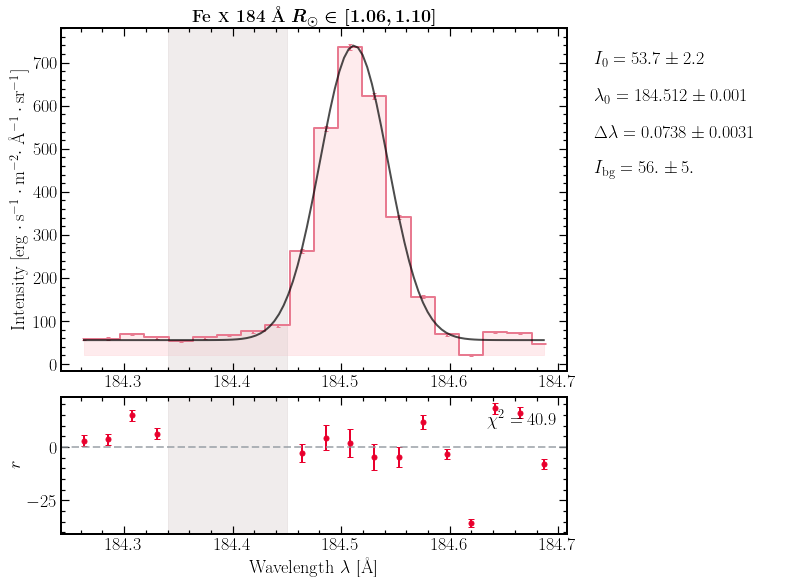

In [15]:
FeX_184_fitmodel_r2 = SpectrumFitSingle(data=FeX_184_data_aver_r2, wvl=FeX_184_wvl,err=FeX_184_err_aver_r2,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_r2.run_lse(absolute_sigma=False)
FeX_184_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.10]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 23.7 mÅ


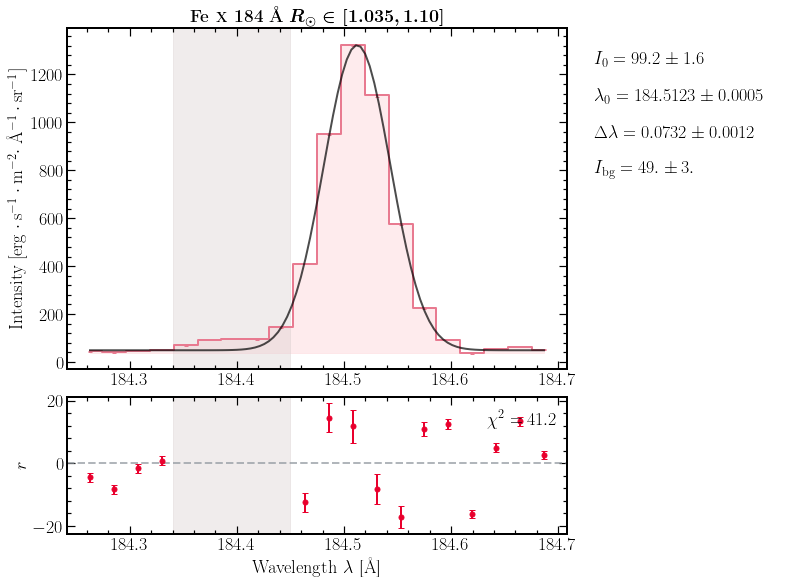

In [16]:
FeX_184_fitmodel_all = SpectrumFitSingle(data=FeX_184_data_aver_all, wvl=FeX_184_wvl,err=FeX_184_err_aver_all,
                                        line_number=1,line_wvl_init=[184.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        mask=[[184.34,184.45]])
FeX_184_fitmodel_all.run_lse(absolute_sigma=False)
FeX_184_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{x} 184 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.10]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeX_184_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [17]:
FeVIII_185_slice = slice(833,850)
FeVIII_185_wvl = wvl_cube_0[FeVIII_185_slice]

FeVIII_185_region_1, FeVIII_185_region_2 = return_mask(np.mean(ccd_offset_0[FeVIII_185_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeVIII_185_data_region_1 = data_cube_0[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_data_region_2 = data_cube_0[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]
FeVIII_185_err_region_1 = err_cube_0[FeVIII_185_region_1[0],FeVIII_185_region_1[1],FeVIII_185_slice]
FeVIII_185_err_region_2 = err_cube_0[FeVIII_185_region_2[0],FeVIII_185_region_2[1],FeVIII_185_slice]

FeVIII_185_data_aver_r1 = np.nanmean(FeVIII_185_data_region_1, axis=0)
FeVIII_185_data_aver_r2 = np.nanmean(FeVIII_185_data_region_2, axis=0)
FeVIII_185_data_aver_all = np.nanmean(data_cube_0[:,:,FeVIII_185_slice], axis=(0,1))

FeVIII_185_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_185_err_region_1**2,axis=0))/np.sqrt(FeVIII_185_err_region_1.shape[0])
FeVIII_185_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_185_err_region_2**2,axis=0))/np.sqrt(FeVIII_185_err_region_2.shape[0])
FeVIII_185_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeVIII_185_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 31.9 mÅ


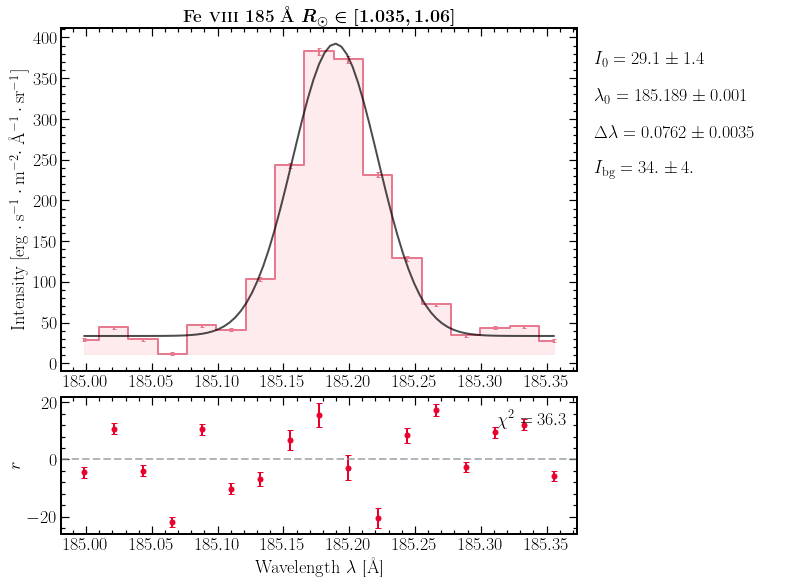

In [18]:
FeVIII_185_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_185_data_aver_r1, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r1,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 33.0 mÅ


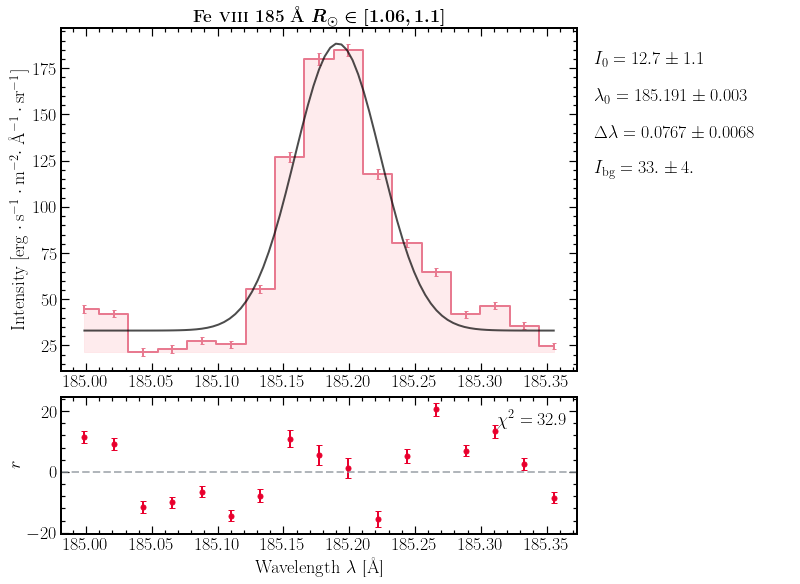

In [19]:
FeVIII_185_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_185_data_aver_r2, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_r2,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 31.0 mÅ


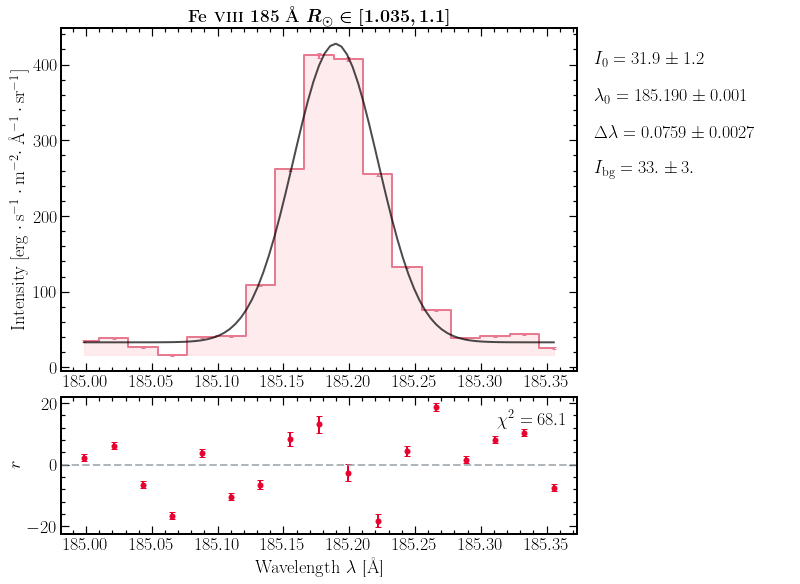

In [20]:
FeVIII_185_fitmodel_all = SpectrumFitSingle(data=FeVIII_185_data_aver_all, wvl=FeVIII_185_wvl,err=FeVIII_185_err_aver_all,
                                        line_number=1,line_wvl_init=[185.2],int_max_init=[1e3],fwhm_init=[0.07],
                                        )
FeVIII_185_fitmodel_all.run_lse(absolute_sigma=False)
FeVIII_185_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{viii} 185 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_185_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [21]:
FeVIII_186_slice = slice(898,912)
FeVIII_186_wvl = wvl_cube_0[FeVIII_186_slice]

FeVIII_186_region_1, FeVIII_186_region_2 = return_mask(np.mean(ccd_offset_0[FeVIII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeVIII_186_data_region_1 = data_cube_0[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_data_region_2 = data_cube_0[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]
FeVIII_186_err_region_1 = err_cube_0[FeVIII_186_region_1[0],FeVIII_186_region_1[1],FeVIII_186_slice]
FeVIII_186_err_region_2 = err_cube_0[FeVIII_186_region_2[0],FeVIII_186_region_2[1],FeVIII_186_slice]

FeVIII_186_data_aver_r1 = np.nanmean(FeVIII_186_data_region_1, axis=0)
FeVIII_186_data_aver_r2 = np.nanmean(FeVIII_186_data_region_2, axis=0)
FeVIII_186_data_aver_all = np.nanmean(data_cube_0[:,:,FeVIII_186_slice], axis=(0,1))

FeVIII_186_err_aver_r1 = np.sqrt(np.nanmean(FeVIII_186_err_region_1**2,axis=0))/np.sqrt(FeVIII_186_err_region_1.shape[0])
FeVIII_186_err_aver_r2 = np.sqrt(np.nanmean(FeVIII_186_err_region_2**2,axis=0))/np.sqrt(FeVIII_186_err_region_2.shape[0])
FeVIII_186_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeVIII_186_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 28.1 mÅ


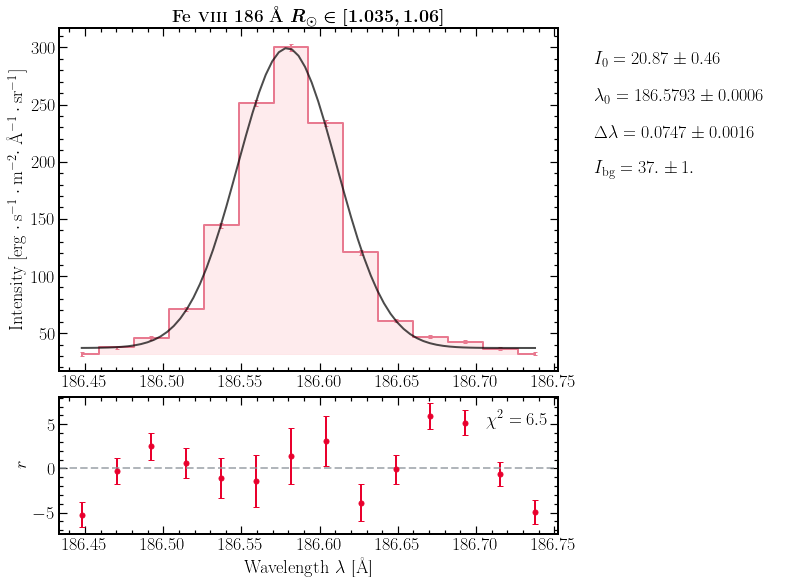

In [22]:
FeVIII_186_fitmodel_r1 = SpectrumFitSingle(data=FeVIII_186_data_aver_r1, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 45.0 mÅ


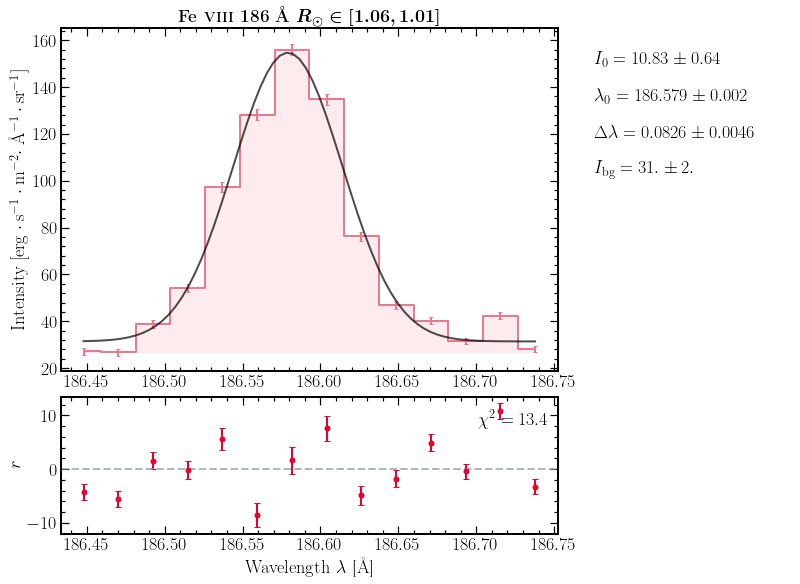

In [23]:
FeVIII_186_fitmodel_r2 = SpectrumFitSingle(data=FeVIII_186_data_aver_r2, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_r2,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_r2.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.01]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 29.4 mÅ


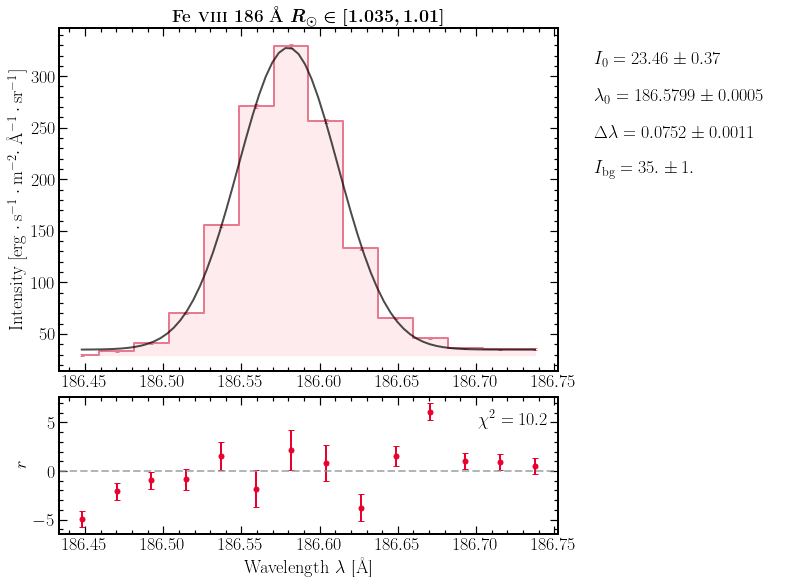

In [24]:
FeVIII_186_fitmodel_all = SpectrumFitSingle(data=FeVIII_186_data_aver_all, wvl=FeVIII_186_wvl,err=FeVIII_186_err_aver_all,
                                        line_number=1,line_wvl_init=[186.6],int_max_init=[5e2],fwhm_init=[0.07],
                                        )
FeVIII_186_fitmodel_all.run_lse(absolute_sigma=False)
FeVIII_186_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{viii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.01]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeVIII_186_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [25]:
FeXII_186_slice = slice(910,930)
FeXII_186_wvl = wvl_cube_0[FeXII_186_slice]

FeXII_186_region_1, FeXII_186_region_2 = return_mask(np.mean(ccd_offset_0[FeXII_186_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXII_186_data_region_1 = data_cube_0[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_data_region_2 = data_cube_0[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]
FeXII_186_err_region_1 = err_cube_0[FeXII_186_region_1[0],FeXII_186_region_1[1],FeXII_186_slice]
FeXII_186_err_region_2 = err_cube_0[FeXII_186_region_2[0],FeXII_186_region_2[1],FeXII_186_slice]

FeXII_186_data_aver_r1 = np.nanmean(FeXII_186_data_region_1, axis=0)
FeXII_186_data_aver_r2 = np.nanmean(FeXII_186_data_region_2, axis=0)
FeXII_186_data_aver_all = np.nanmean(data_cube_0[:,:,FeXII_186_slice], axis=(0,1))

FeXII_186_err_aver_r1 = np.sqrt(np.nanmean(FeXII_186_err_region_1**2,axis=0))/np.sqrt(FeXII_186_err_region_1.shape[0])
FeXII_186_err_aver_r2 = np.sqrt(np.nanmean(FeXII_186_err_region_2**2,axis=0))/np.sqrt(FeXII_186_err_region_2.shape[0])
FeXII_186_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXII_186_slice]**2,axis=(0,1)))/np.sqrt(160*16)

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.06]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

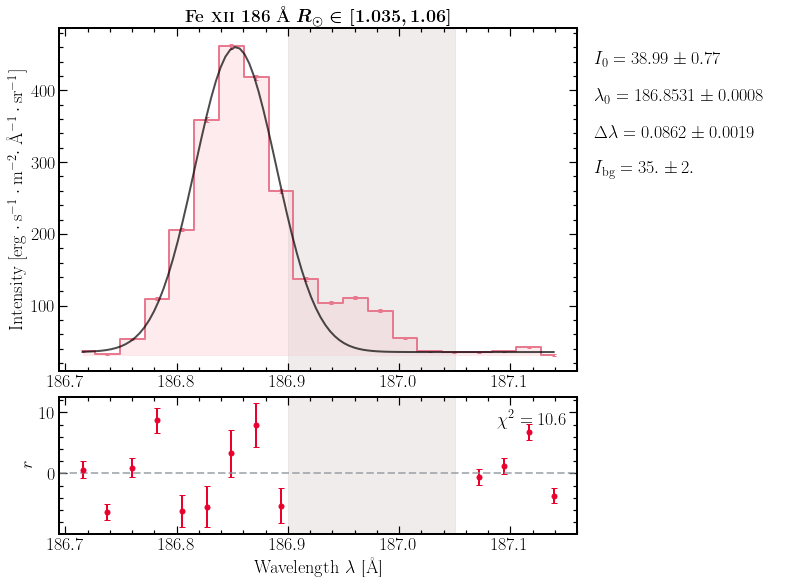

In [26]:
FeXII_186_fitmodel_r1 = SpectrumFitSingle(data=FeXII_186_data_aver_r1, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_r1,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_r1.plot(plot_fit=False)
FeXII_186_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.06,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

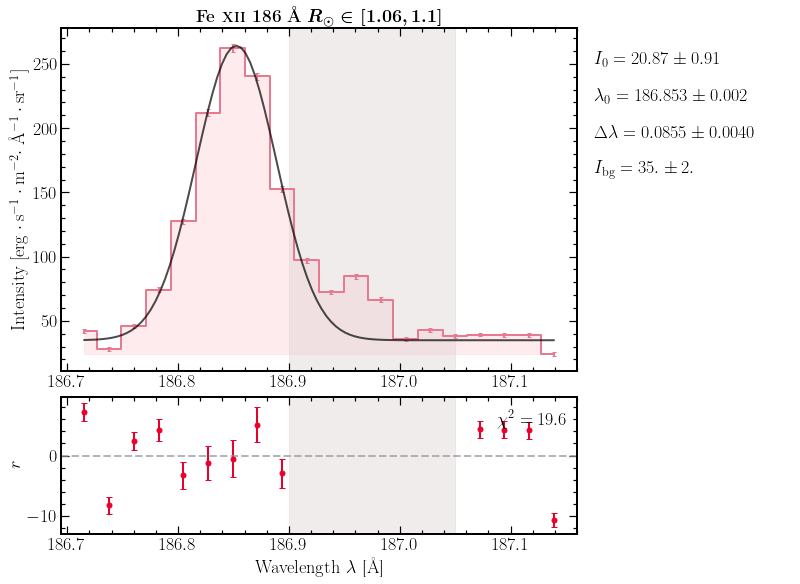

In [27]:
FeXII_186_fitmodel_r2 = SpectrumFitSingle(data=FeXII_186_data_aver_r2, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_r2,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[3e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_r2.plot(plot_fit=False)
FeXII_186_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xii} 186 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

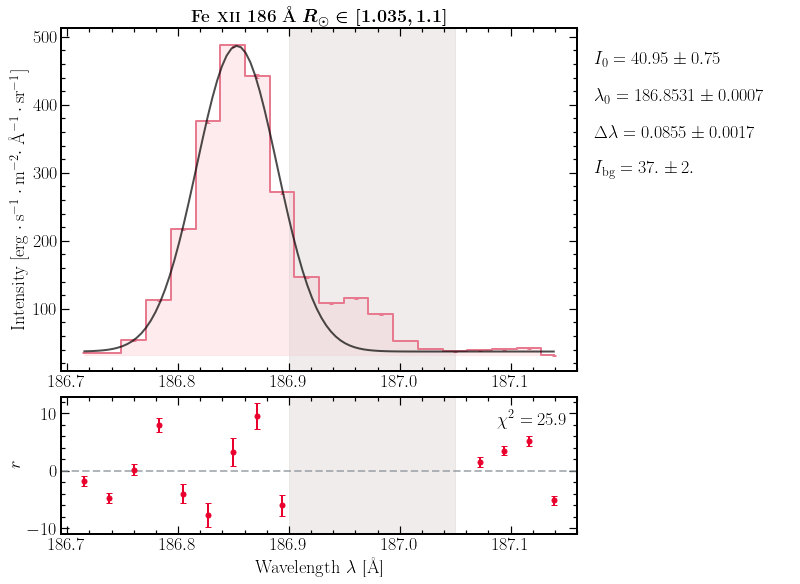

In [28]:
FeXII_186_fitmodel_all = SpectrumFitSingle(data=FeXII_186_data_aver_all, wvl=FeXII_186_wvl,err=FeXII_186_err_aver_all,
                                        line_number=1,line_wvl_init=[186.88],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[186.9,187.05]])
# FeXII_186_fitmodel_all.plot(plot_fit=False)
FeXII_186_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_186_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 186 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

In [29]:
FeXI_188_slice = slice(970,990)
FeXI_188_wvl = wvl_cube_0[FeXI_188_slice]

FeXI_188_region_1, FeXI_188_region_2 = return_mask(np.mean(ccd_offset_0[FeXI_188_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXI_188_data_region_1 = data_cube_0[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_data_region_2 = data_cube_0[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]
FeXI_188_err_region_1 = err_cube_0[FeXI_188_region_1[0],FeXI_188_region_1[1],FeXI_188_slice]
FeXI_188_err_region_2 = err_cube_0[FeXI_188_region_2[0],FeXI_188_region_2[1],FeXI_188_slice]

FeXI_188_data_aver_r1 = np.nanmean(FeXI_188_data_region_1, axis=0)
FeXI_188_data_aver_r2 = np.nanmean(FeXI_188_data_region_2, axis=0)
FeXI_188_data_aver_all = np.nanmean(data_cube_0[:,:,FeXI_188_slice], axis=(0,1))

FeXI_188_err_aver_r1 = np.sqrt(np.nanmean(FeXI_188_err_region_1**2,axis=0))/np.sqrt(FeXI_188_err_region_1.shape[0])
FeXI_188_err_aver_r2 = np.sqrt(np.nanmean(FeXI_188_err_region_2**2,axis=0))/np.sqrt(FeXI_188_err_region_2.shape[0])
FeXI_188_err_aver_all = np.sqrt(np.nanmean(err_cube_0[:,:,FeXI_188_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 27.1 mÅ


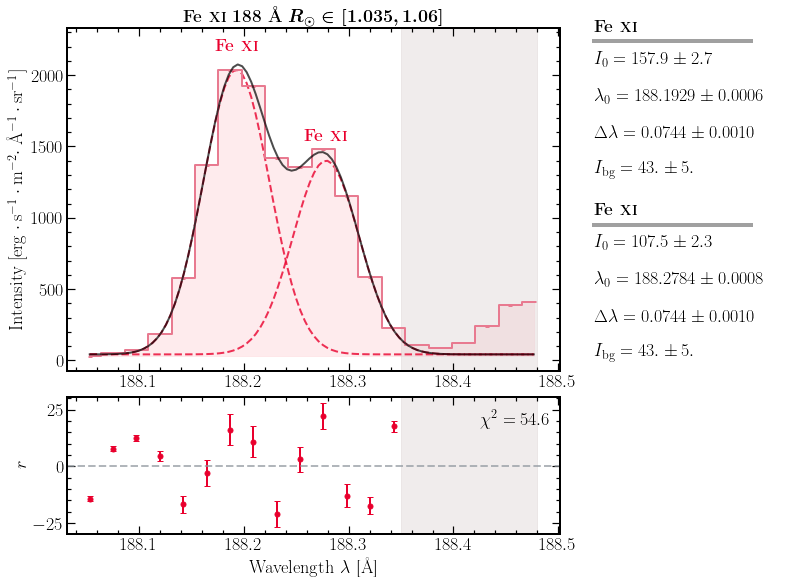

In [30]:
FeXI_188_fitmodel_r1 = SpectrumFitSingle(data=FeXI_188_data_aver_r1, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_r1,
                                        line_number=2,line_wvl_init=[188.21,188.299],int_max_init=[1e3,1e3],fwhm_init=[0.07],
                                        same_width=True,mask=[[188.35,188.48]])
# FeXI_188_fitmodel_r1.plot(plot_fit=False)
FeXI_188_fitmodel_r1.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r1.fwhm_fit**2 - slit_width_aver**2)*1e3))

Corrected line width 33.0 mÅ


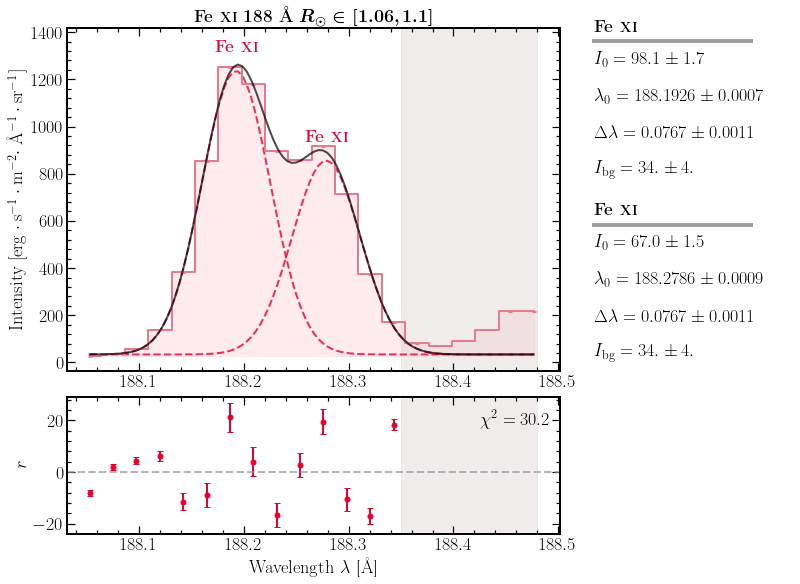

In [31]:
FeXI_188_fitmodel_r2 = SpectrumFitSingle(data=FeXI_188_data_aver_r2, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_r2,
                                        line_number=2,line_wvl_init=[188.21,188.299],int_max_init=[1e3,1e3],fwhm_init=[0.07],
                                        same_width=True,mask=[[188.35,188.48]])
# FeXI_188_fitmodel_r2.plot(plot_fit=False)
FeXI_188_fitmodel_r2.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_r2.fwhm_fit**2 - slit_width_aver**2)*1e3))

Corrected line width 27.8 mÅ


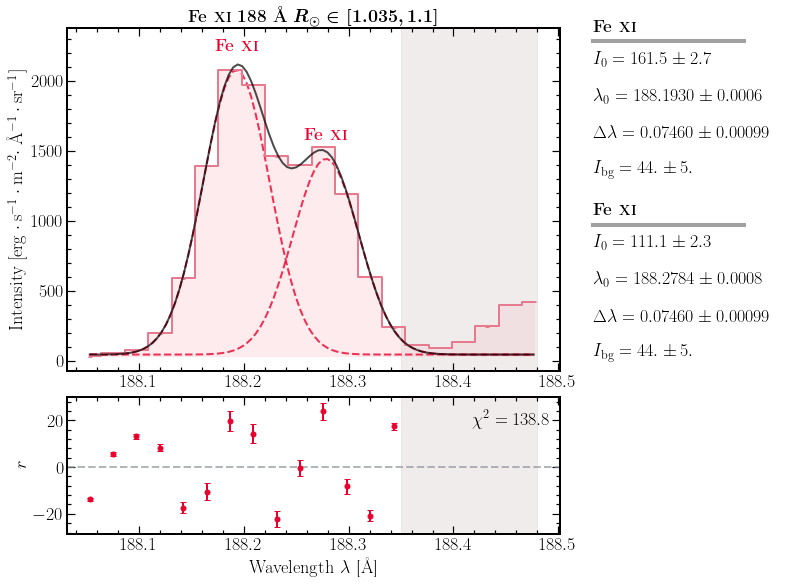

In [32]:
FeXI_188_fitmodel_all = SpectrumFitSingle(data=FeXI_188_data_aver_all, wvl=FeXI_188_wvl,err=FeXI_188_err_aver_all,
                                        line_number=2,line_wvl_init=[188.21,188.299],int_max_init=[1e3,1e3],fwhm_init=[0.07],
                                        same_width=True,mask=[[188.35,188.48]])
# FeXI_188_fitmodel_all.plot(plot_fit=False)
FeXI_188_fitmodel_all.run_lse(absolute_sigma=False)
FeXI_188_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xi} 188 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",line_caption=[r"\textbf{Fe \textsc{xi}}",r"\textbf{Fe \textsc{xi}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXI_188_fitmodel_all.fwhm_fit**2 - slit_width_aver**2)*1e3))

In [33]:
FeIX_191_slice = slice(83,100)
FeIX_191_wvl = wvl_cube_1[FeIX_191_slice]

FeIX_191_region_1, FeIX_191_region_2 = return_mask(np.mean(ccd_offset_0[FeIX_191_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeIX_191_data_region_1 = data_cube_1[FeIX_191_region_1[0],FeIX_191_region_1[1],FeIX_191_slice]
FeIX_191_data_region_2 = data_cube_1[FeIX_191_region_2[0],FeIX_191_region_2[1],FeIX_191_slice]
FeIX_191_err_region_1 = err_cube_1[FeIX_191_region_1[0],FeIX_191_region_1[1],FeIX_191_slice]
FeIX_191_err_region_2 = err_cube_1[FeIX_191_region_2[0],FeIX_191_region_2[1],FeIX_191_slice]

FeIX_191_data_aver_r1 = np.nanmean(FeIX_191_data_region_1, axis=0)
FeIX_191_data_aver_r2 = np.nanmean(FeIX_191_data_region_2, axis=0)
FeIX_191_data_aver_all = np.nanmean(data_cube_1[:,:,FeIX_191_slice], axis=(0,1))

FeIX_191_err_aver_r1 = np.sqrt(np.nanmean(FeIX_191_err_region_1**2,axis=0))/np.sqrt(FeIX_191_err_region_1.shape[0])
FeIX_191_err_aver_r2 = np.sqrt(np.nanmean(FeIX_191_err_region_2**2,axis=0))/np.sqrt(FeIX_191_err_region_2.shape[0])
FeIX_191_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeIX_191_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 73.6 mÅ


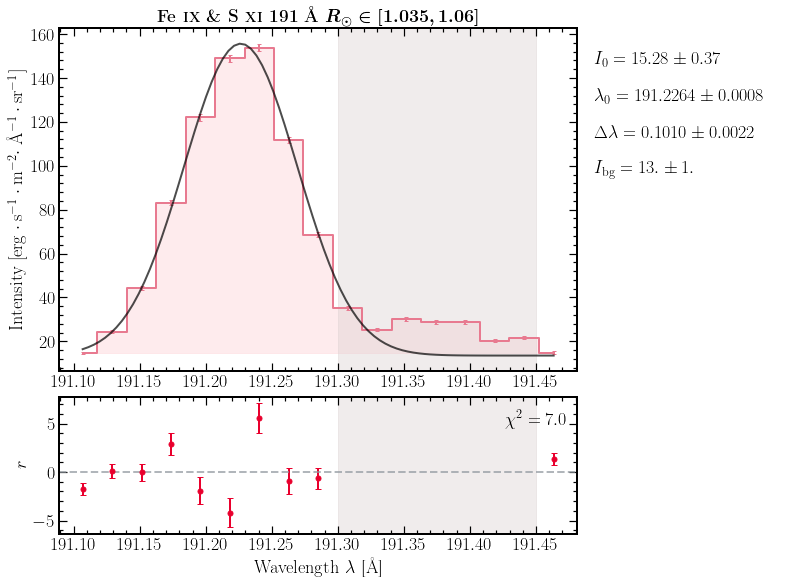

In [34]:
FeIX_191_fitmodel_r1 = SpectrumFitSingle(data=FeIX_191_data_aver_r1, wvl=FeIX_191_wvl,err=FeIX_191_err_aver_r1,
                                        line_number=1,line_wvl_init=[191.23],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[191.30,191.45]])
# FeIX_191_fitmodel_r1.plot(plot_fit=False)
FeIX_191_fitmodel_r1.run_lse(absolute_sigma=False)
FeIX_191_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{ix} \& S \textsc{xi} 191 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_191_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 63.4 mÅ


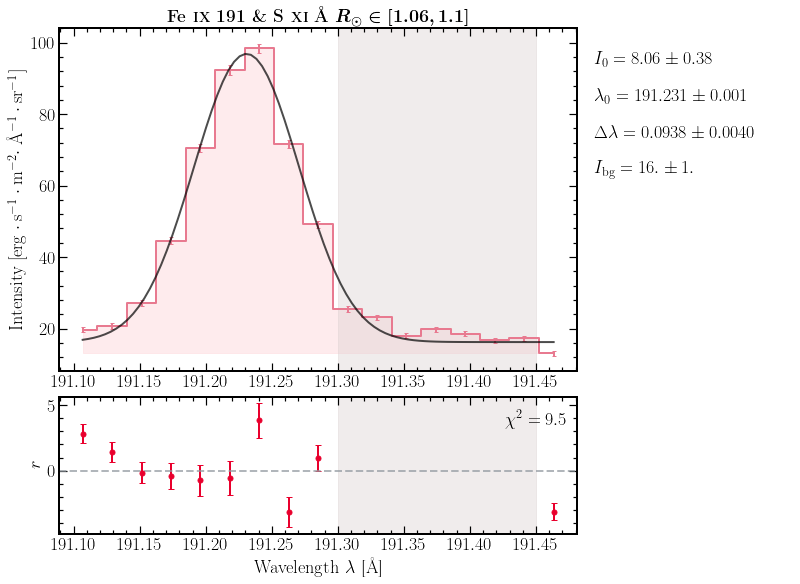

In [35]:
FeIX_191_fitmodel_r2 = SpectrumFitSingle(data=FeIX_191_data_aver_r2, wvl=FeIX_191_wvl,err=FeIX_191_err_aver_r2,
                                        line_number=1,line_wvl_init=[191.23],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[191.30,191.45]])
# FeIX_191_fitmodel_r2.plot(plot_fit=False)
FeIX_191_fitmodel_r2.run_lse(absolute_sigma=False)
FeIX_191_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{ix} 191 \& S \textsc{xi} \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_191_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 74.2 mÅ


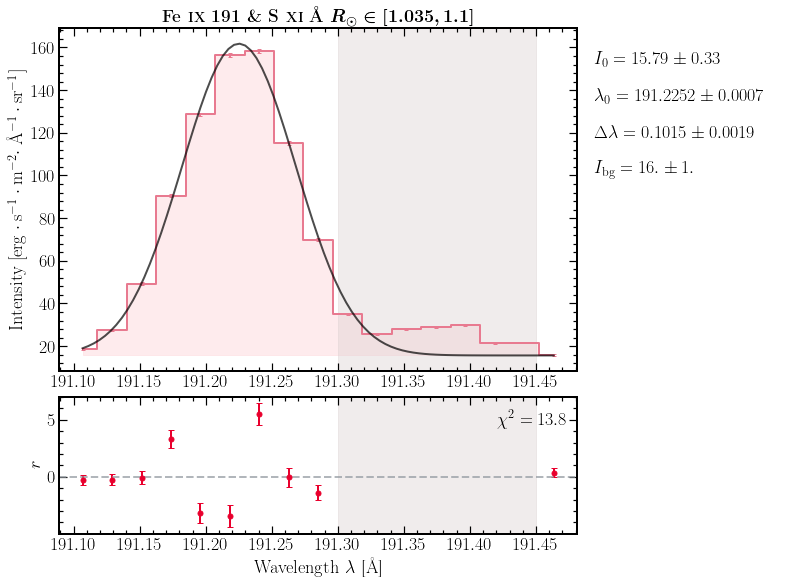

In [36]:
FeIX_191_fitmodel_all = SpectrumFitSingle(data=FeIX_191_data_aver_all, wvl=FeIX_191_wvl,err=FeIX_191_err_aver_all,
                                        line_number=1,line_wvl_init=[191.23],int_max_init=[5e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[191.30,191.45]])
# FeIX_191_fitmodel_all.plot(plot_fit=False)
FeIX_191_fitmodel_all.run_lse(absolute_sigma=False)
FeIX_191_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{ix} 191 \& S \textsc{xi} \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_191_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [37]:
FeXII_192_slice = slice(134,147)
FeXII_192_wvl = wvl_cube_1[FeXII_192_slice]

FeXII_192_region_1, FeXII_192_region_2 = return_mask(np.mean(ccd_offset_0[FeXII_192_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXII_192_data_region_1 = data_cube_1[FeXII_192_region_1[0],FeXII_192_region_1[1],FeXII_192_slice]
FeXII_192_data_region_2 = data_cube_1[FeXII_192_region_2[0],FeXII_192_region_2[1],FeXII_192_slice]
FeXII_192_err_region_1 = err_cube_1[FeXII_192_region_1[0],FeXII_192_region_1[1],FeXII_192_slice]
FeXII_192_err_region_2 = err_cube_1[FeXII_192_region_2[0],FeXII_192_region_2[1],FeXII_192_slice]

FeXII_192_data_aver_r1 = np.nanmean(FeXII_192_data_region_1, axis=0)
FeXII_192_data_aver_r2 = np.nanmean(FeXII_192_data_region_2, axis=0)
FeXII_192_data_aver_all = np.nanmean(data_cube_1[:,:,FeXII_192_slice], axis=(0,1))

FeXII_192_err_aver_r1 = np.sqrt(np.nanmean(FeXII_192_err_region_1**2,axis=0))/np.sqrt(FeXII_192_err_region_1.shape[0])
FeXII_192_err_aver_r2 = np.sqrt(np.nanmean(FeXII_192_err_region_2**2,axis=0))/np.sqrt(FeXII_192_err_region_2.shape[0])
FeXII_192_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeXII_192_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 24.8 mÅ


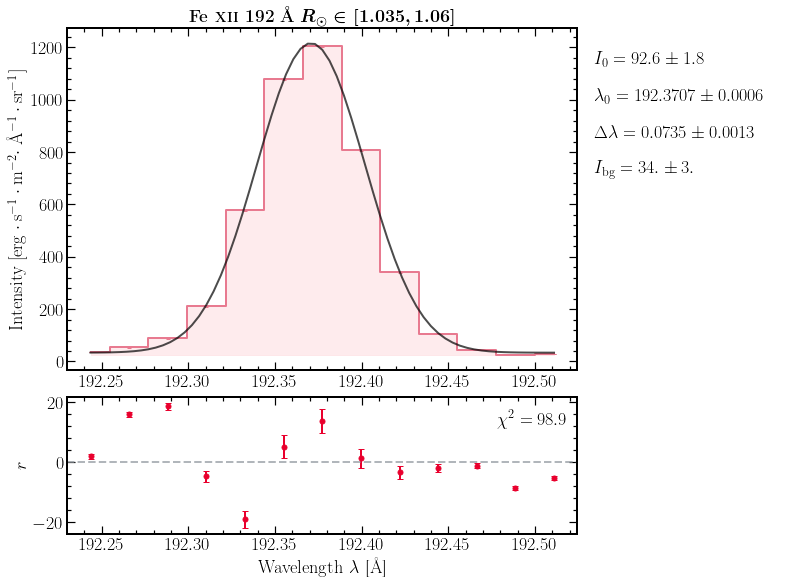

In [38]:
FeXII_192_fitmodel_r1 = SpectrumFitSingle(data=FeXII_192_data_aver_r1, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_r1,
                                        line_number=1,line_wvl_init=[192.39],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_192_fitmodel_r1.plot(plot_fit=False)
FeXII_192_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 27.8 mÅ


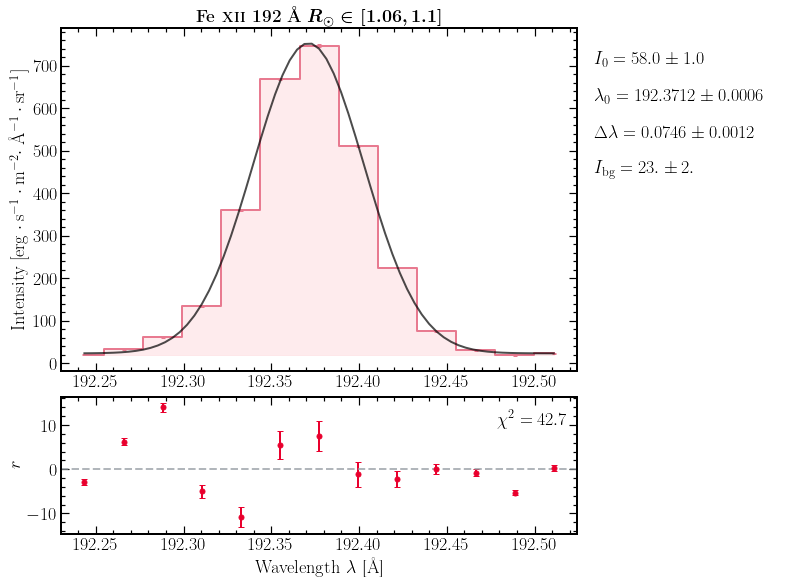

In [39]:
FeXII_192_fitmodel_r2 = SpectrumFitSingle(data=FeXII_192_data_aver_r2, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_r2,
                                        line_number=1,line_wvl_init=[192.39],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_192_fitmodel_r2.plot(plot_fit=False)
FeXII_192_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 25.0 mÅ


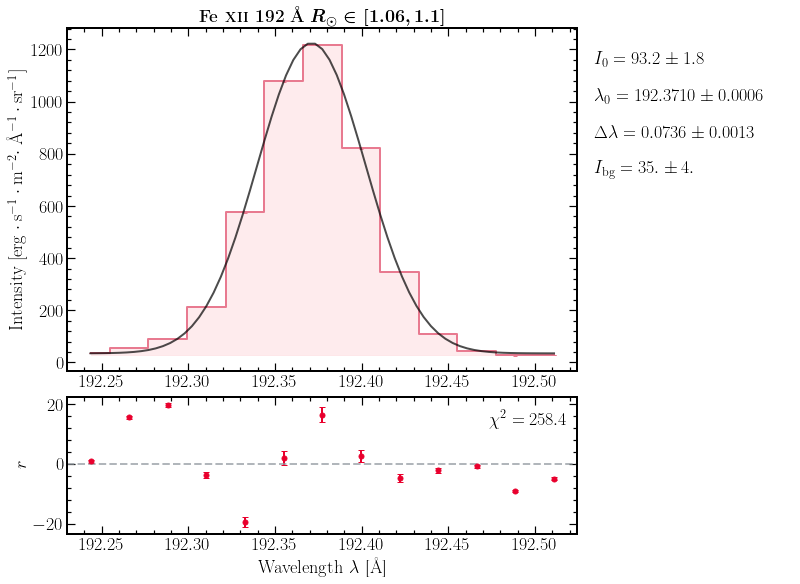

In [40]:
FeXII_192_fitmodel_all = SpectrumFitSingle(data=FeXII_192_data_aver_all, wvl=FeXII_192_wvl,err=FeXII_192_err_aver_all,
                                        line_number=1,line_wvl_init=[192.39],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_192_fitmodel_all.plot(plot_fit=False)
FeXII_192_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_192_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 192 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_192_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [41]:
FeXII_193_slice = slice(181,197)
FeXII_193_wvl = wvl_cube_1[FeXII_193_slice]

FeXII_193_region_1, FeXII_193_region_2 = return_mask(np.mean(ccd_offset_0[FeXII_193_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXII_193_data_region_1 = data_cube_1[FeXII_193_region_1[0],FeXII_193_region_1[1],FeXII_193_slice]
FeXII_193_data_region_2 = data_cube_1[FeXII_193_region_2[0],FeXII_193_region_2[1],FeXII_193_slice]
FeXII_193_err_region_1 = err_cube_1[FeXII_193_region_1[0],FeXII_193_region_1[1],FeXII_193_slice]
FeXII_193_err_region_2 = err_cube_1[FeXII_193_region_2[0],FeXII_193_region_2[1],FeXII_193_slice]

FeXII_193_data_aver_r1 = np.nanmean(FeXII_193_data_region_1, axis=0)
FeXII_193_data_aver_r2 = np.nanmean(FeXII_193_data_region_2, axis=0)
FeXII_193_data_aver_all = np.nanmean(data_cube_1[:,:,FeXII_193_slice], axis=(0,1))

FeXII_193_err_aver_r1 = np.sqrt(np.nanmean(FeXII_193_err_region_1**2,axis=0))/np.sqrt(FeXII_193_err_region_1.shape[0])
FeXII_193_err_aver_r2 = np.sqrt(np.nanmean(FeXII_193_err_region_2**2,axis=0))/np.sqrt(FeXII_193_err_region_2.shape[0])
FeXII_193_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeXII_193_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 30.7 mÅ


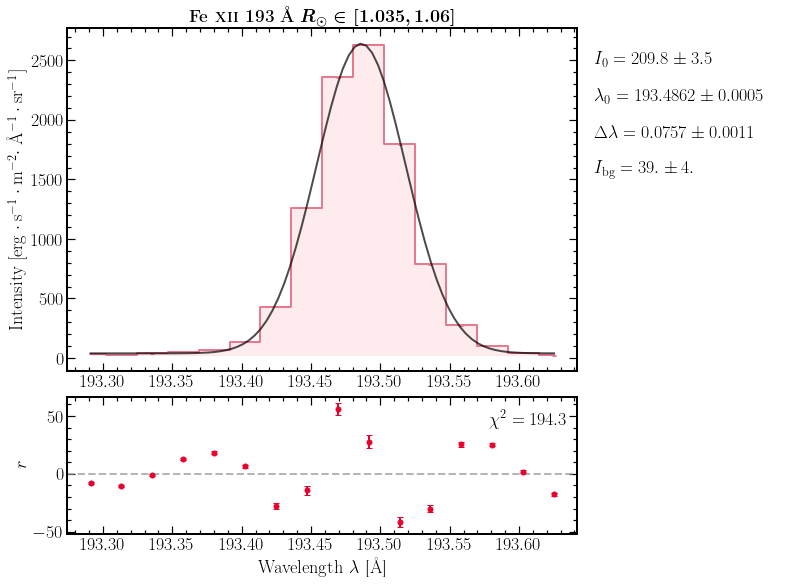

In [42]:
FeXII_193_fitmodel_r1 = SpectrumFitSingle(data=FeXII_193_data_aver_r1, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_r1,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_193_fitmodel_r1.plot(plot_fit=False)
FeXII_193_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 30.6 mÅ


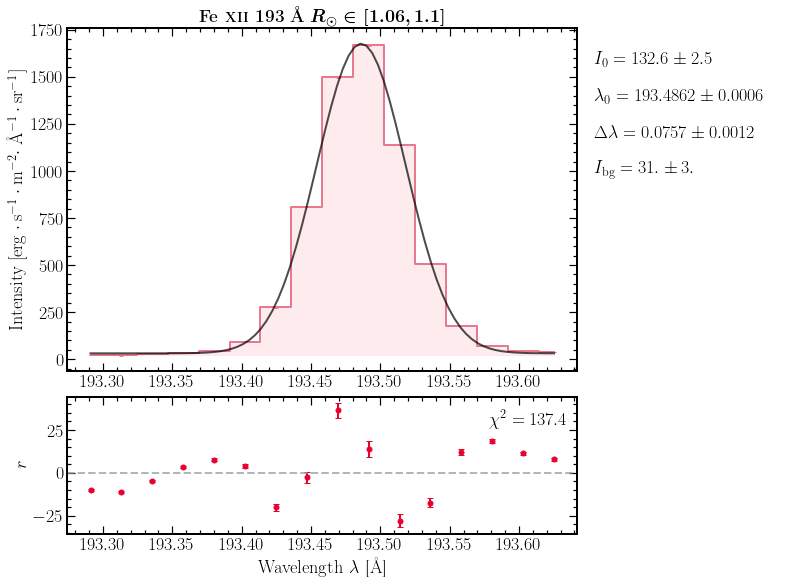

In [43]:
FeXII_193_fitmodel_r2 = SpectrumFitSingle(data=FeXII_193_data_aver_r2, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_r2,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_193_fitmodel_r2.plot(plot_fit=False)
FeXII_193_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 31.4 mÅ


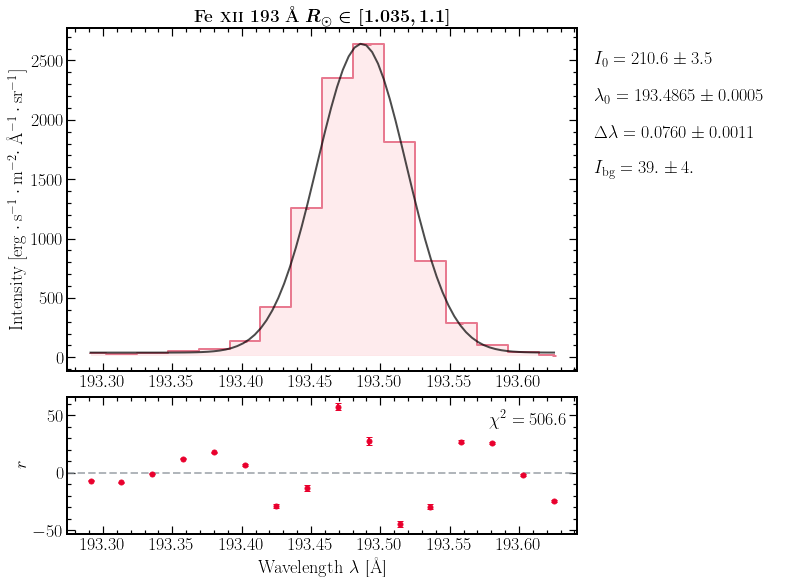

In [44]:
FeXII_193_fitmodel_all = SpectrumFitSingle(data=FeXII_193_data_aver_all, wvl=FeXII_193_wvl,err=FeXII_193_err_aver_all,
                                        line_number=1,line_wvl_init=[193.5],int_max_init=[1e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_193_fitmodel_all.plot(plot_fit=False)
FeXII_193_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_193_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 193 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_193_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [45]:
MnX_194_slice = slice(221,235)
MnX_194_wvl = wvl_cube_1[MnX_194_slice]

MnX_194_region_1, MnX_194_region_2 = return_mask(np.mean(ccd_offset_0[MnX_194_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

MnX_194_data_region_1 = data_cube_1[MnX_194_region_1[0],MnX_194_region_1[1],MnX_194_slice]
MnX_194_data_region_2 = data_cube_1[MnX_194_region_2[0],MnX_194_region_2[1],MnX_194_slice]
MnX_194_err_region_1 = err_cube_1[MnX_194_region_1[0],MnX_194_region_1[1],MnX_194_slice]
MnX_194_err_region_2 = err_cube_1[MnX_194_region_2[0],MnX_194_region_2[1],MnX_194_slice]

MnX_194_data_aver_r1 = np.nanmean(MnX_194_data_region_1, axis=0)
MnX_194_data_aver_r2 = np.nanmean(MnX_194_data_region_2, axis=0)
MnX_194_data_aver_all = np.nanmean(data_cube_1[:,:,MnX_194_slice], axis=(0,1))

MnX_194_err_aver_r1 = np.sqrt(np.nanmean(MnX_194_err_region_1**2,axis=0))/np.sqrt(MnX_194_err_region_1.shape[0])
MnX_194_err_aver_r2 = np.sqrt(np.nanmean(MnX_194_err_region_2**2,axis=0))/np.sqrt(MnX_194_err_region_2.shape[0])
MnX_194_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,MnX_194_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 58.9 mÅ


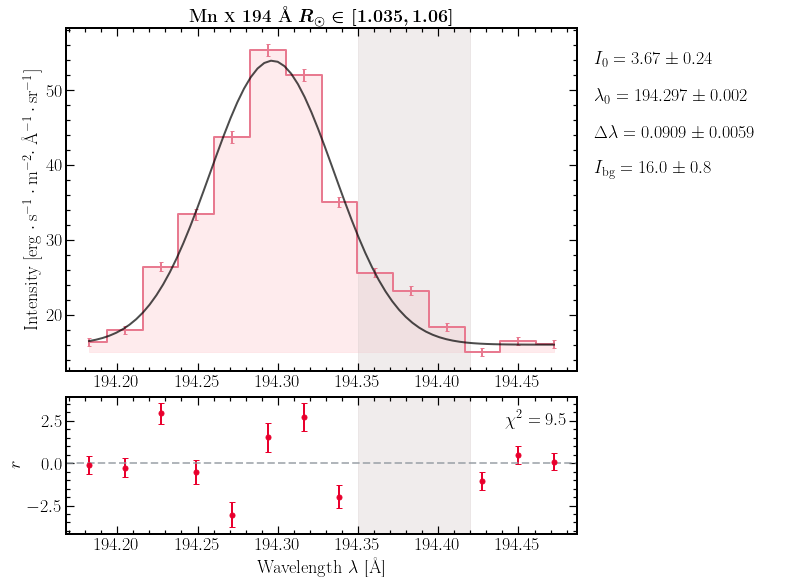

In [46]:
MnX_194_fitmodel_r1 = SpectrumFitSingle(data=MnX_194_data_aver_r1, wvl=MnX_194_wvl,err=MnX_194_err_aver_r1,
                                        line_number=1,line_wvl_init=[194.3],int_max_init=[50],fwhm_init=[0.07],
                                        same_width=False,mask=[[194.35,194.42]])
# MnX_194_fitmodel_r1.plot(plot_fit=False)
MnX_194_fitmodel_r1.run_lse(absolute_sigma=False)
MnX_194_fitmodel_r1.plot(plot_title=r"\textbf{Mn \textsc{x} 194 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(MnX_194_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 18.3 mÅ


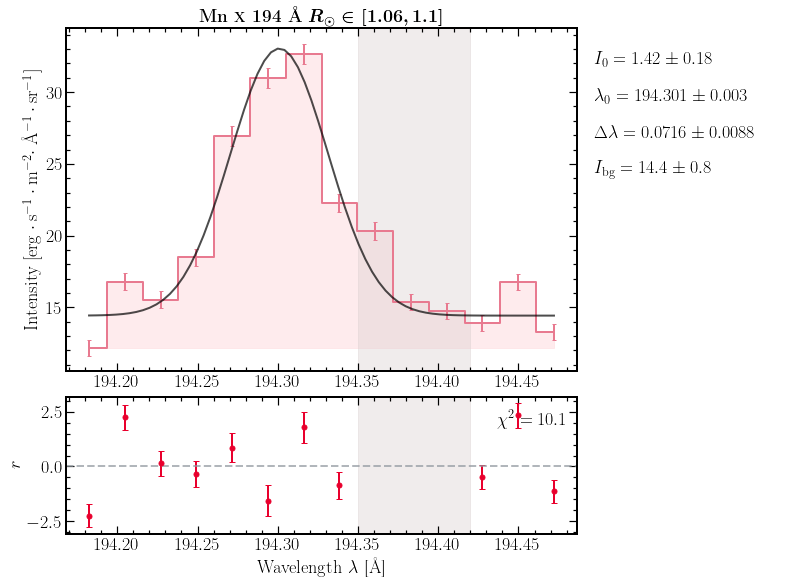

In [47]:
MnX_194_fitmodel_r2 = SpectrumFitSingle(data=MnX_194_data_aver_r2, wvl=MnX_194_wvl,err=MnX_194_err_aver_r2,
                                        line_number=1,line_wvl_init=[194.3],int_max_init=[50],fwhm_init=[0.07],
                                        same_width=False,mask=[[194.35,194.42]])
# MnX_194_fitmodel_r2.plot(plot_fit=False)
MnX_194_fitmodel_r2.run_lse(absolute_sigma=False)
MnX_194_fitmodel_r2.plot(plot_title=r"\textbf{Mn \textsc{x} 194 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(MnX_194_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 49.2 mÅ


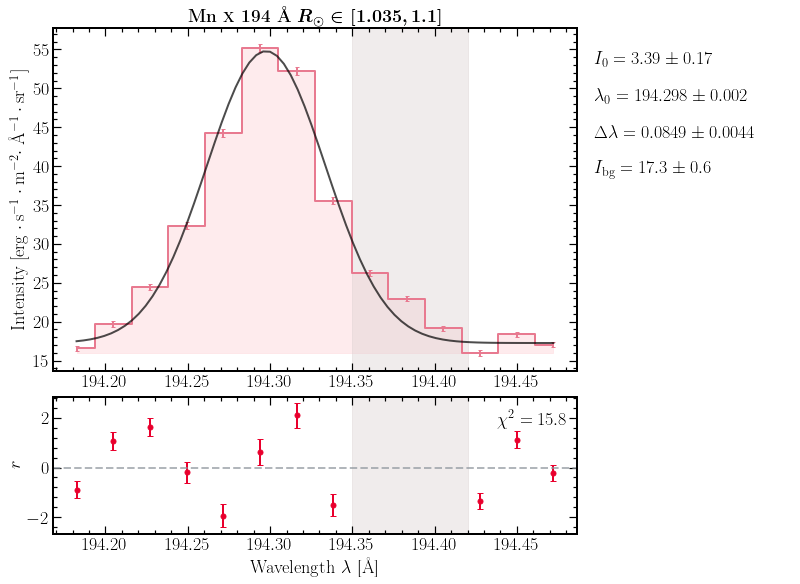

In [48]:
MnX_194_fitmodel_all = SpectrumFitSingle(data=MnX_194_data_aver_all, wvl=MnX_194_wvl,err=MnX_194_err_aver_all,
                                        line_number=1,line_wvl_init=[194.3],int_max_init=[50],fwhm_init=[0.07],
                                        same_width=False,mask=[[194.35,194.42]])
# MnX_194_fitmodel_all.plot(plot_fit=False)
MnX_194_fitmodel_all.run_lse(absolute_sigma=False)
MnX_194_fitmodel_all.plot(plot_title=r"\textbf{Mn \textsc{x} 194 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(MnX_194_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [49]:
FeXII_195_slice = slice(255,270)
FeXII_195_wvl = wvl_cube_1[FeXII_195_slice]

FeXII_195_region_1, FeXII_195_region_2 = return_mask(np.mean(ccd_offset_0[FeXII_195_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXII_195_data_region_1 = data_cube_1[FeXII_195_region_1[0],FeXII_195_region_1[1],FeXII_195_slice]
FeXII_195_data_region_2 = data_cube_1[FeXII_195_region_2[0],FeXII_195_region_2[1],FeXII_195_slice]
FeXII_195_err_region_1 = err_cube_1[FeXII_195_region_1[0],FeXII_195_region_1[1],FeXII_195_slice]
FeXII_195_err_region_2 = err_cube_1[FeXII_195_region_2[0],FeXII_195_region_2[1],FeXII_195_slice]

FeXII_195_data_aver_r1 = np.nanmean(FeXII_195_data_region_1, axis=0)
FeXII_195_data_aver_r2 = np.nanmean(FeXII_195_data_region_2, axis=0)
FeXII_195_data_aver_all = np.nanmean(data_cube_1[:,:,FeXII_195_slice], axis=(0,1))

FeXII_195_err_aver_r1 = np.sqrt(np.nanmean(FeXII_195_err_region_1**2,axis=0))/np.sqrt(FeXII_195_err_region_1.shape[0])
FeXII_195_err_aver_r2 = np.sqrt(np.nanmean(FeXII_195_err_region_2**2,axis=0))/np.sqrt(FeXII_195_err_region_2.shape[0])
FeXII_195_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeXII_195_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 30.4 mÅ


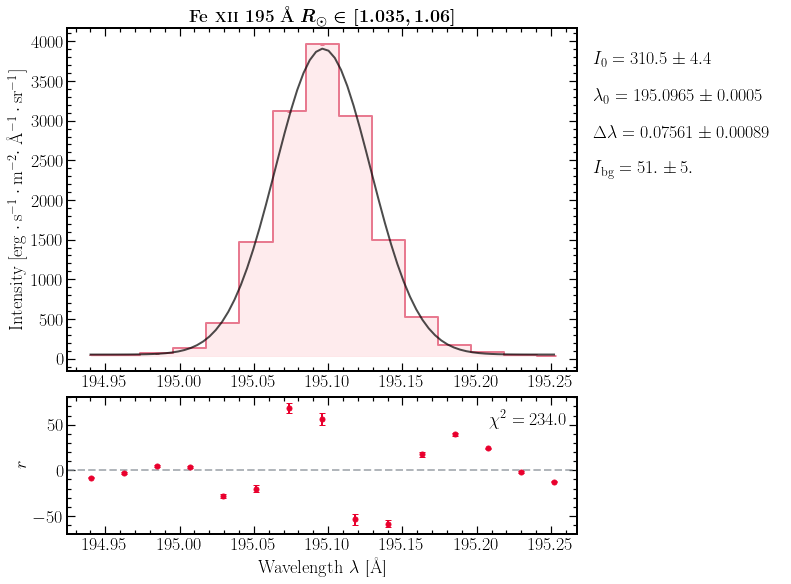

In [50]:
FeXII_195_fitmodel_r1 = SpectrumFitSingle(data=FeXII_195_data_aver_r1, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r1,
                                        line_number=1,line_wvl_init=[195.1],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_195_fitmodel_r1.plot(plot_fit=False)
FeXII_195_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 25.2 mÅ


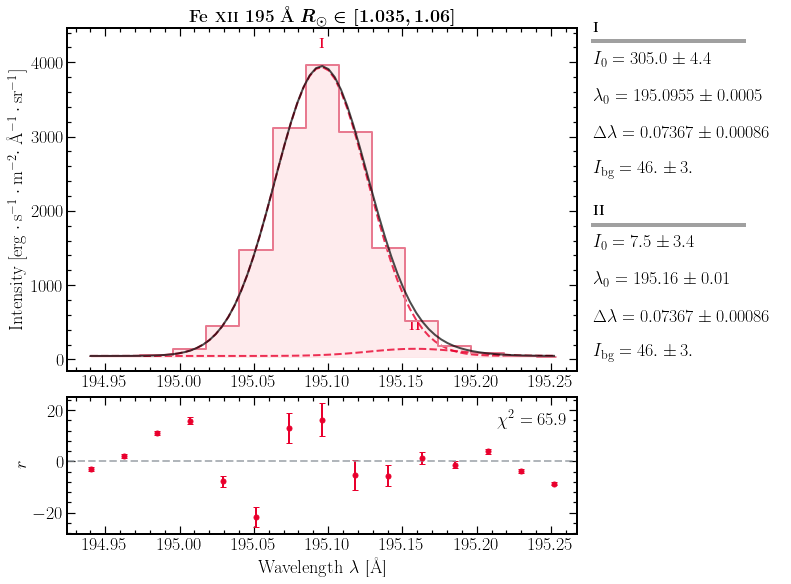

In [51]:
FeXII_195_fitmodel_r1 = SpectrumFitSingle(data=FeXII_195_data_aver_r1, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r1,
                                        line_number=2,line_wvl_init=[195.1,195.17],int_max_init=[2e3,1e2],fwhm_init=[0.07],
                                        same_width=True)
# FeXII_195_fitmodel_r1.plot(plot_fit=False)
FeXII_195_fitmodel_r1.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r1.fwhm_fit**2 - slit_width_aver**2)*1e3))

Corrected line width 32.4 mÅ


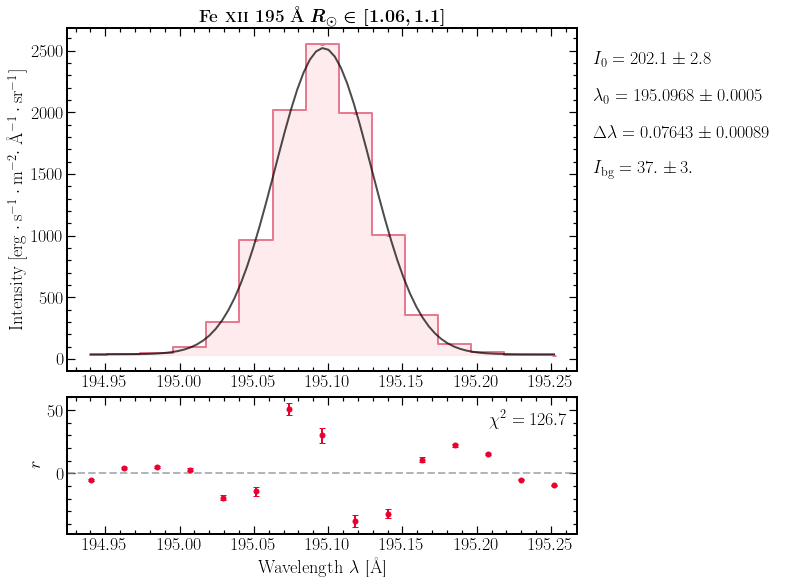

In [52]:
FeXII_195_fitmodel_r2 = SpectrumFitSingle(data=FeXII_195_data_aver_r2, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r2,
                                        line_number=1,line_wvl_init=[195.1],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_195_fitmodel_r2.plot(plot_fit=False)
FeXII_195_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 27.0 mÅ


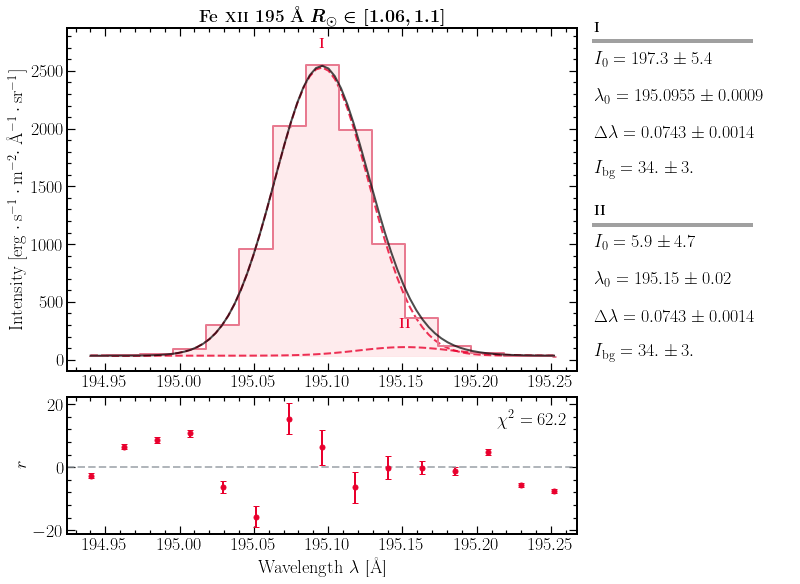

In [53]:
FeXII_195_fitmodel_r2 = SpectrumFitSingle(data=FeXII_195_data_aver_r2, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_r2,
                                        line_number=2,line_wvl_init=[195.1,195.17],int_max_init=[2e3,1e2],fwhm_init=[0.07],
                                        same_width=True)
# FeXII_195_fitmodel_r2.plot(plot_fit=False)
FeXII_195_fitmodel_r2.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_r2.fwhm_fit**2 - slit_width_aver**2)*1e3))

Corrected line width 31.2 mÅ


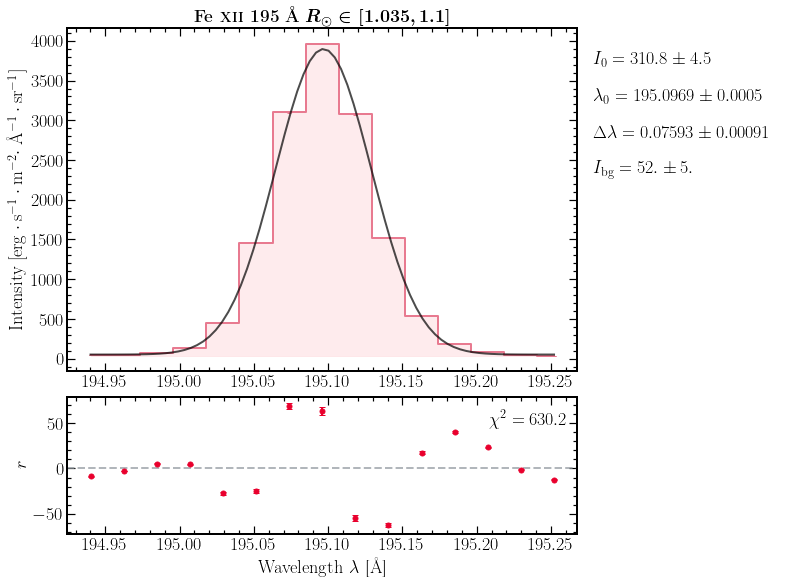

In [54]:
FeXII_195_fitmodel_all = SpectrumFitSingle(data=FeXII_195_data_aver_all, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_all,
                                        line_number=1,line_wvl_init=[195.1],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXII_195_fitmodel_all.plot(plot_fit=False)
FeXII_195_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 25.8 mÅ


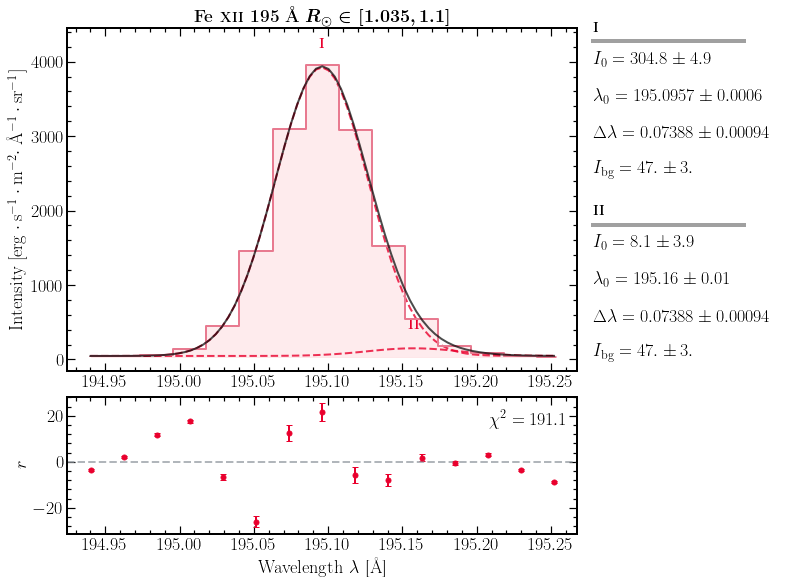

In [55]:
FeXII_195_fitmodel_all = SpectrumFitSingle(data=FeXII_195_data_aver_all, wvl=FeXII_195_wvl,err=FeXII_195_err_aver_all,
                                        line_number=2,line_wvl_init=[195.1,195.17],int_max_init=[2e3,1e2],fwhm_init=[0.07],
                                        same_width=True)
# FeXII_195_fitmodel_all.plot(plot_fit=False)
FeXII_195_fitmodel_all.run_lse(absolute_sigma=False)
FeXII_195_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xii} 195 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXII_195_fitmodel_all.fwhm_fit**2 - slit_width_aver**2)*1e3))

In [56]:
FeIX_197_slice = slice(375,395)
FeIX_197_wvl = wvl_cube_1[FeIX_197_slice]

FeIX_197_region_1, FeIX_197_region_2 = return_mask(np.mean(ccd_offset_0[FeIX_197_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeIX_197_data_region_1 = data_cube_1[FeIX_197_region_1[0],FeIX_197_region_1[1],FeIX_197_slice]
FeIX_197_data_region_2 = data_cube_1[FeIX_197_region_2[0],FeIX_197_region_2[1],FeIX_197_slice]
FeIX_197_err_region_1 = err_cube_1[FeIX_197_region_1[0],FeIX_197_region_1[1],FeIX_197_slice]
FeIX_197_err_region_2 = err_cube_1[FeIX_197_region_2[0],FeIX_197_region_2[1],FeIX_197_slice]

FeIX_197_data_aver_r1 = np.nanmean(FeIX_197_data_region_1, axis=0)
FeIX_197_data_aver_r2 = np.nanmean(FeIX_197_data_region_2, axis=0)
FeIX_197_data_aver_all = np.nanmean(data_cube_1[:,:,FeIX_197_slice], axis=(0,1))

FeIX_197_err_aver_r1 = np.sqrt(np.nanmean(FeIX_197_err_region_1**2,axis=0))/np.sqrt(FeIX_197_err_region_1.shape[0])
FeIX_197_err_aver_r2 = np.sqrt(np.nanmean(FeIX_197_err_region_2**2,axis=0))/np.sqrt(FeIX_197_err_region_2.shape[0])
FeIX_197_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeIX_197_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 35.7 mÅ


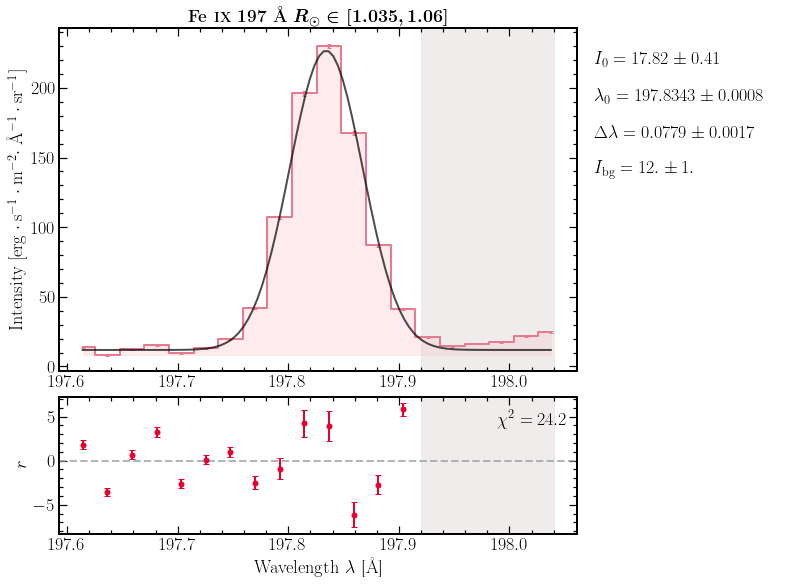

In [57]:
FeIX_197_fitmodel_r1 = SpectrumFitSingle(data=FeIX_197_data_aver_r1, wvl=FeIX_197_wvl,err=FeIX_197_err_aver_r1,
                                        line_number=1,line_wvl_init=[197.85],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[197.92,198.04]])
# FeIX_197_fitmodel_r1.plot(plot_fit=False)
FeIX_197_fitmodel_r1.run_lse(absolute_sigma=False)
FeIX_197_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_197_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 31.1 mÅ


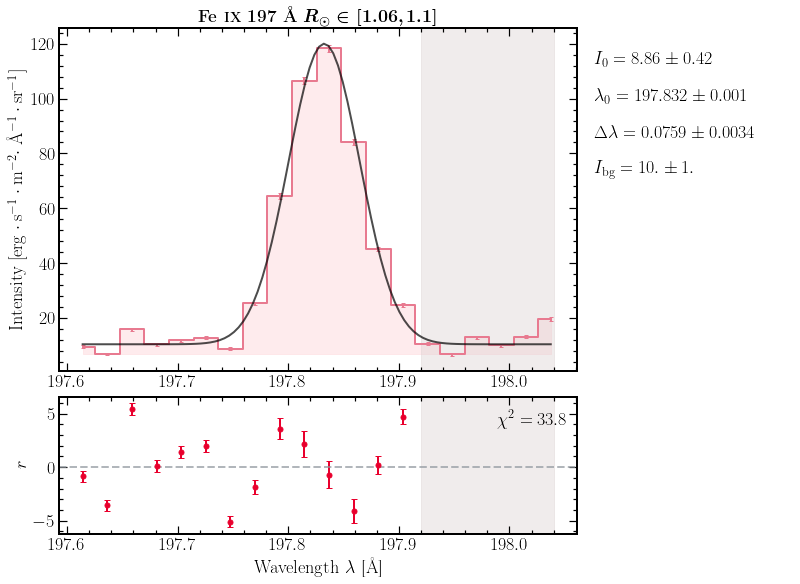

In [58]:
FeIX_197_fitmodel_r2 = SpectrumFitSingle(data=FeIX_197_data_aver_r2, wvl=FeIX_197_wvl,err=FeIX_197_err_aver_r2,
                                        line_number=1,line_wvl_init=[197.85],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[197.92,198.04]])
# FeIX_197_fitmodel_r2.plot(plot_fit=False)
FeIX_197_fitmodel_r2.run_lse(absolute_sigma=False)
FeIX_197_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_197_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 34.9 mÅ


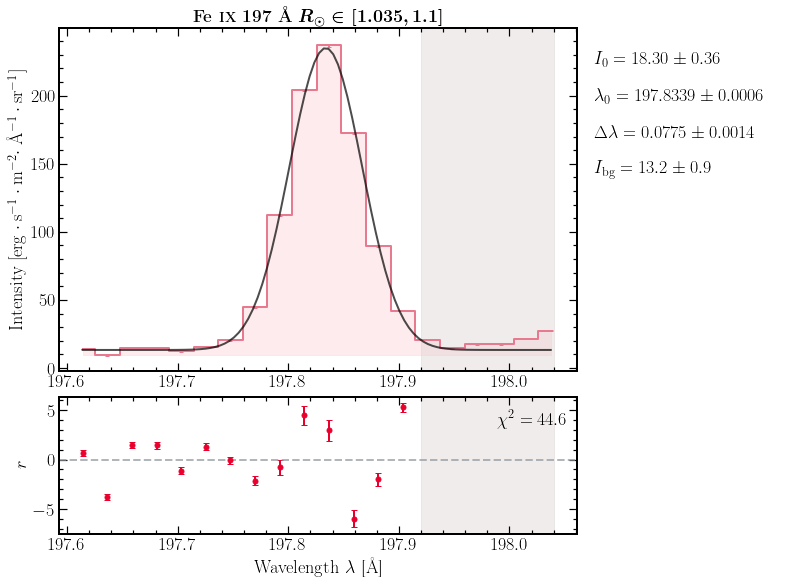

In [59]:
FeIX_197_fitmodel_all = SpectrumFitSingle(data=FeIX_197_data_aver_all, wvl=FeIX_197_wvl,err=FeIX_197_err_aver_all,
                                        line_number=1,line_wvl_init=[197.85],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[197.92,198.04]])
# FeIX_197_fitmodel_all.plot(plot_fit=False)
FeIX_197_fitmodel_all.run_lse(absolute_sigma=False)
FeIX_197_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{ix} 197 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeIX_197_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [60]:
FeXIII_202_slice = slice(566,582)
FeXIII_202_wvl = wvl_cube_1[FeXIII_202_slice]

FeXIII_202_region_1, FeXIII_202_region_2 = return_mask(np.mean(ccd_offset_0[FeXIII_202_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXIII_202_data_region_1 = data_cube_1[FeXIII_202_region_1[0],FeXIII_202_region_1[1],FeXIII_202_slice]
FeXIII_202_data_region_2 = data_cube_1[FeXIII_202_region_2[0],FeXIII_202_region_2[1],FeXIII_202_slice]
FeXIII_202_err_region_1 = err_cube_1[FeXIII_202_region_1[0],FeXIII_202_region_1[1],FeXIII_202_slice]
FeXIII_202_err_region_2 = err_cube_1[FeXIII_202_region_2[0],FeXIII_202_region_2[1],FeXIII_202_slice]

FeXIII_202_data_aver_r1 = np.nanmean(FeXIII_202_data_region_1, axis=0)
FeXIII_202_data_aver_r2 = np.nanmean(FeXIII_202_data_region_2, axis=0)
FeXIII_202_data_aver_all = np.nanmean(data_cube_1[:,:,FeXIII_202_slice], axis=(0,1))

FeXIII_202_err_aver_r1 = np.sqrt(np.nanmean(FeXIII_202_err_region_1**2,axis=0))/np.sqrt(FeXIII_202_err_region_1.shape[0])
FeXIII_202_err_aver_r2 = np.sqrt(np.nanmean(FeXIII_202_err_region_2**2,axis=0))/np.sqrt(FeXIII_202_err_region_2.shape[0])
FeXIII_202_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeXIII_202_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 28.4 mÅ


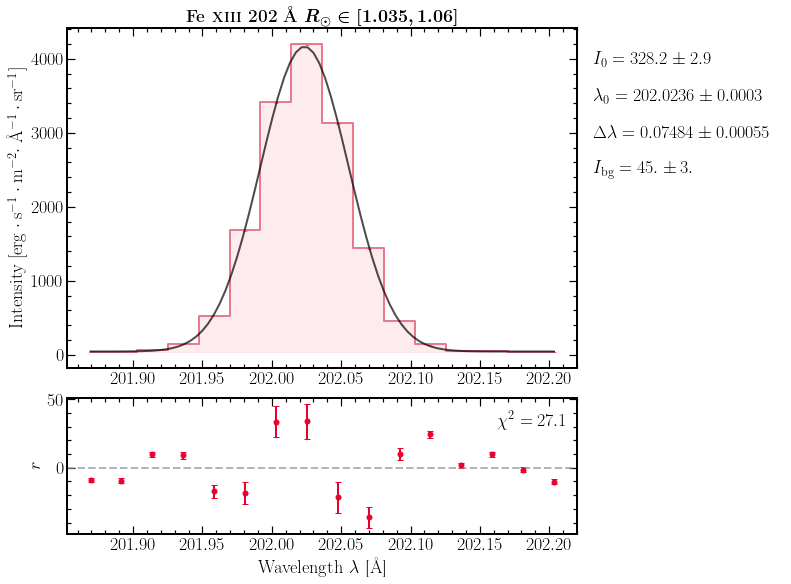

In [61]:
FeXIII_202_fitmodel_r1 = SpectrumFitSingle(data=FeXIII_202_data_aver_r1, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_r1,
                                        line_number=1,line_wvl_init=[202.03],int_max_init=[4e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXIII_202_fitmodel_r1.plot(plot_fit=False)
FeXIII_202_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 30.0 mÅ


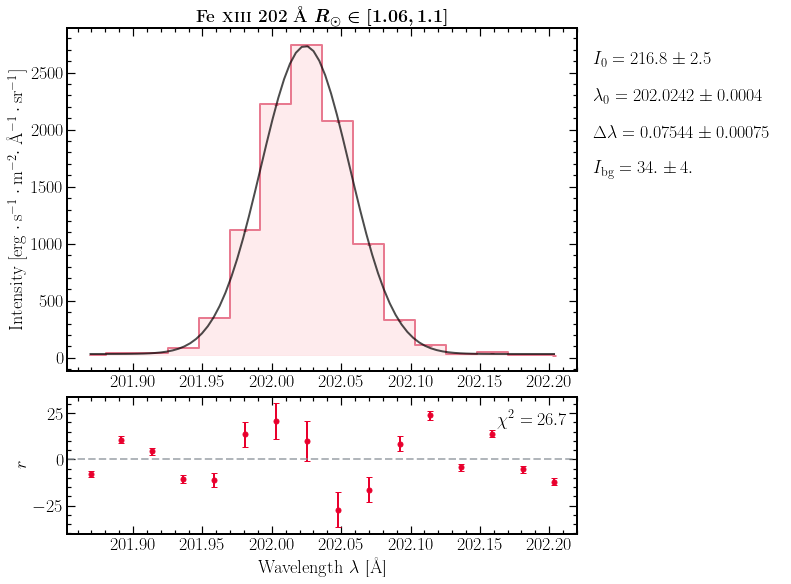

In [62]:
FeXIII_202_fitmodel_r2 = SpectrumFitSingle(data=FeXIII_202_data_aver_r2, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_r2,
                                        line_number=1,line_wvl_init=[202.03],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXIII_202_fitmodel_r2.plot(plot_fit=False)
FeXIII_202_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 28.7 mÅ


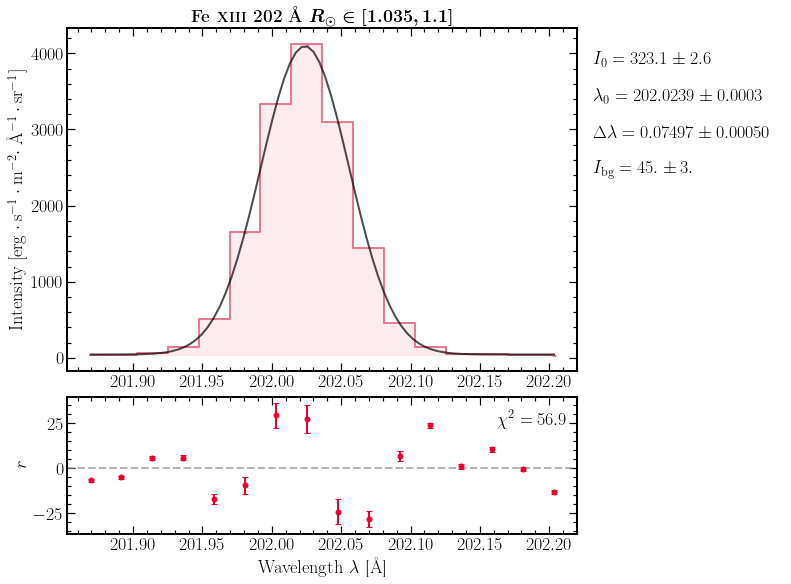

In [63]:
FeXIII_202_fitmodel_all = SpectrumFitSingle(data=FeXIII_202_data_aver_all, wvl=FeXIII_202_wvl,err=FeXIII_202_err_aver_all,
                                        line_number=1,line_wvl_init=[202.03],int_max_init=[4e3],fwhm_init=[0.07],
                                        same_width=False)
# FeXIII_202_fitmodel_all.plot(plot_fit=False)
FeXIII_202_fitmodel_all.run_lse(absolute_sigma=False)
FeXIII_202_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xiii} 202 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIII_202_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [64]:
FeXIV_211_slice = slice(985,995)
FeXIV_211_wvl = wvl_cube_1[FeXIV_211_slice]

FeXIV_211_region_1, FeXIV_211_region_2 = return_mask(np.mean(ccd_offset_0[FeXIV_211_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXIV_211_data_region_1 = data_cube_1[FeXIV_211_region_1[0],FeXIV_211_region_1[1],FeXIV_211_slice]
FeXIV_211_data_region_2 = data_cube_1[FeXIV_211_region_2[0],FeXIV_211_region_2[1],FeXIV_211_slice]
FeXIV_211_err_region_1 = err_cube_1[FeXIV_211_region_1[0],FeXIV_211_region_1[1],FeXIV_211_slice]
FeXIV_211_err_region_2 = err_cube_1[FeXIV_211_region_2[0],FeXIV_211_region_2[1],FeXIV_211_slice]

FeXIV_211_data_aver_r1 = np.nanmean(FeXIV_211_data_region_1, axis=0)
FeXIV_211_data_aver_r2 = np.nanmean(FeXIV_211_data_region_2, axis=0)
FeXIV_211_data_aver_all = np.nanmean(data_cube_1[:,:,FeXIV_211_slice], axis=(0,1))

FeXIV_211_err_aver_r1 = np.sqrt(np.nanmean(FeXIV_211_err_region_1**2,axis=0))/np.sqrt(FeXIV_211_err_region_1.shape[0])
FeXIV_211_err_aver_r2 = np.sqrt(np.nanmean(FeXIV_211_err_region_2**2,axis=0))/np.sqrt(FeXIV_211_err_region_2.shape[0])
FeXIV_211_err_aver_all = np.sqrt(np.nanmean(err_cube_1[:,:,FeXIV_211_slice]**2,axis=(0,1)))/np.sqrt(160*16)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Corrected line width nan mÅ
Corrected line width using smaller inst dlambda 26.0 mÅ


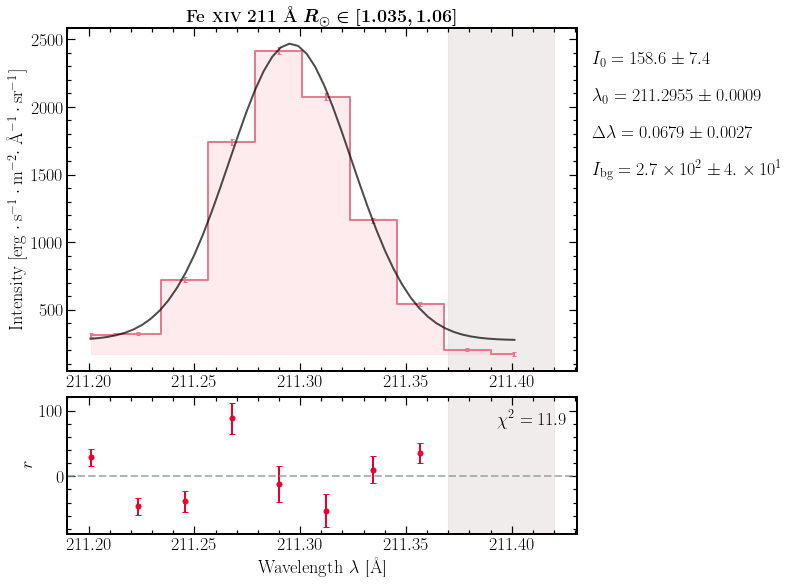

In [65]:
FeXIV_211_fitmodel_r1 = SpectrumFitSingle(data=FeXIV_211_data_aver_r1, wvl=FeXIV_211_wvl,err=FeXIV_211_err_aver_r1,
                                        line_number=1,line_wvl_init=[211.3],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False,mask=[[211.37,211.42]])
# FeXIV_211_fitmodel_r1.plot(plot_fit=False)
FeXIV_211_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIV_211_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiv} 211 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))
print("Corrected line width using smaller inst dlambda {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_r1.fwhm_fit[0]**2 - 0.0627**2)*1e3))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Corrected line width nan mÅ
Corrected line width using smaller inst dlambda 15.9 mÅ


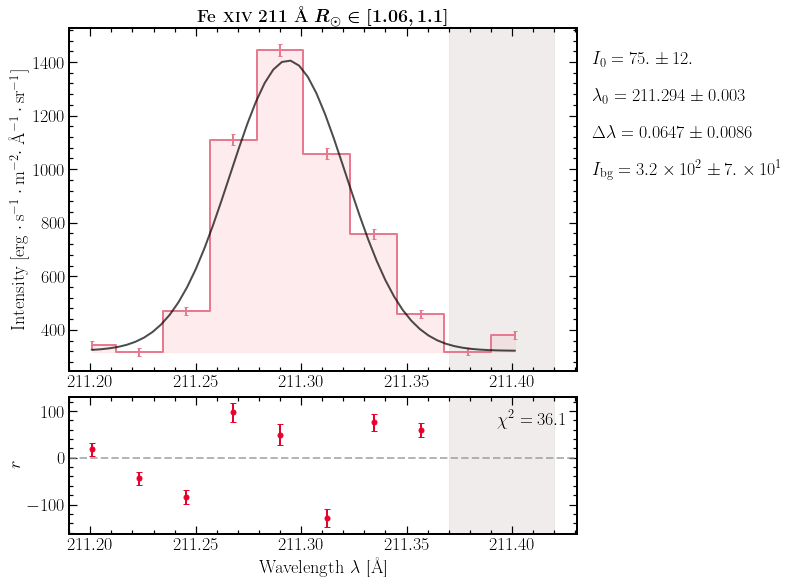

In [66]:
FeXIV_211_fitmodel_r2 = SpectrumFitSingle(data=FeXIV_211_data_aver_r2, wvl=FeXIV_211_wvl,err=FeXIV_211_err_aver_r2,
                                        line_number=1,line_wvl_init=[211.3],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False,mask=[[211.37,211.42]])
# FeXIV_211_fitmodel_r2.plot(plot_fit=False)
FeXIV_211_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIV_211_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiv} 211 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))
print("Corrected line width using smaller inst dlambda {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_r2.fwhm_fit[0]**2 - 0.0627**2)*1e3))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Corrected line width nan mÅ
Corrected line width using smaller inst dlambda 27.8 mÅ


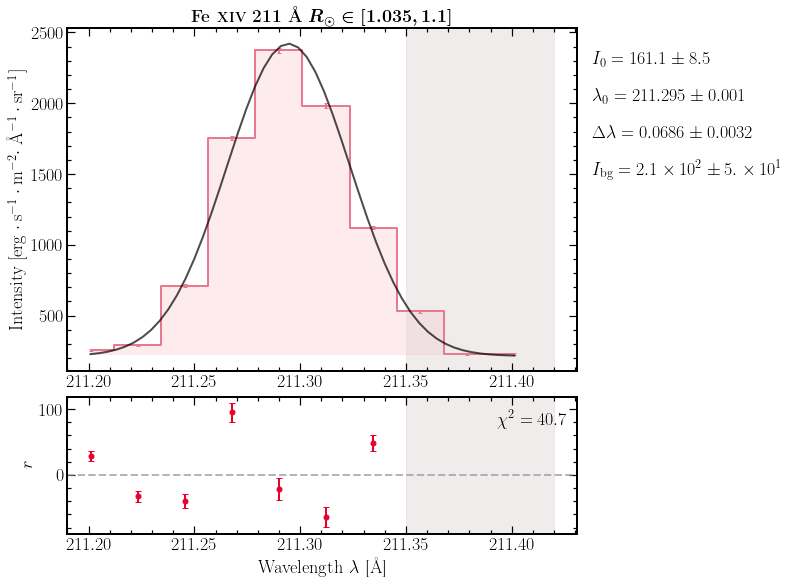

In [67]:
FeXIV_211_fitmodel_all = SpectrumFitSingle(data=FeXIV_211_data_aver_all, wvl=FeXIV_211_wvl,err=FeXIV_211_err_aver_all,
                                        line_number=1,line_wvl_init=[211.3],int_max_init=[2e3],fwhm_init=[0.07],
                                        same_width=False,mask=[[211.35,211.42]])
# FeXIV_211_fitmodel_all.plot(plot_fit=False)
FeXIV_211_fitmodel_all.run_lse(absolute_sigma=False)
FeXIV_211_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xiv} 211 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))
print("Corrected line width using smaller inst dlambda {:.1f} mÅ".format(np.sqrt(FeXIV_211_fitmodel_all.fwhm_fit[0]**2 - 0.0627**2)*1e3))

In [68]:
FeX_257_slice = slice(500,520)
FeX_257_wvl = wvl_cube_2[FeX_257_slice]

FeX_257_region_1, FeX_257_region_2 = return_mask(np.mean(ccd_offset_0[FeX_257_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeX_257_data_region_1 = data_cube_2[FeX_257_region_1[0],FeX_257_region_1[1],FeX_257_slice]
FeX_257_data_region_2 = data_cube_2[FeX_257_region_2[0],FeX_257_region_2[1],FeX_257_slice]
FeX_257_err_region_1 = err_cube_2[FeX_257_region_1[0],FeX_257_region_1[1],FeX_257_slice]
FeX_257_err_region_2 = err_cube_2[FeX_257_region_2[0],FeX_257_region_2[1],FeX_257_slice]

FeX_257_data_aver_r1 = np.nanmean(FeX_257_data_region_1, axis=0)
FeX_257_data_aver_r2 = np.nanmean(FeX_257_data_region_2, axis=0)
FeX_257_data_aver_all = np.nanmean(data_cube_2[:,:,FeX_257_slice], axis=(0,1))

FeX_257_err_aver_r1 = np.sqrt(np.nanmean(FeX_257_err_region_1**2,axis=0))/np.sqrt(FeX_257_err_region_1.shape[0])
FeX_257_err_aver_r2 = np.sqrt(np.nanmean(FeX_257_err_region_2**2,axis=0))/np.sqrt(FeX_257_err_region_2.shape[0])
FeX_257_err_aver_all = np.sqrt(np.nanmean(err_cube_2[:,:,FeX_257_slice]**2,axis=(0,1)))/np.sqrt(160*16)

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 257 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.06]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

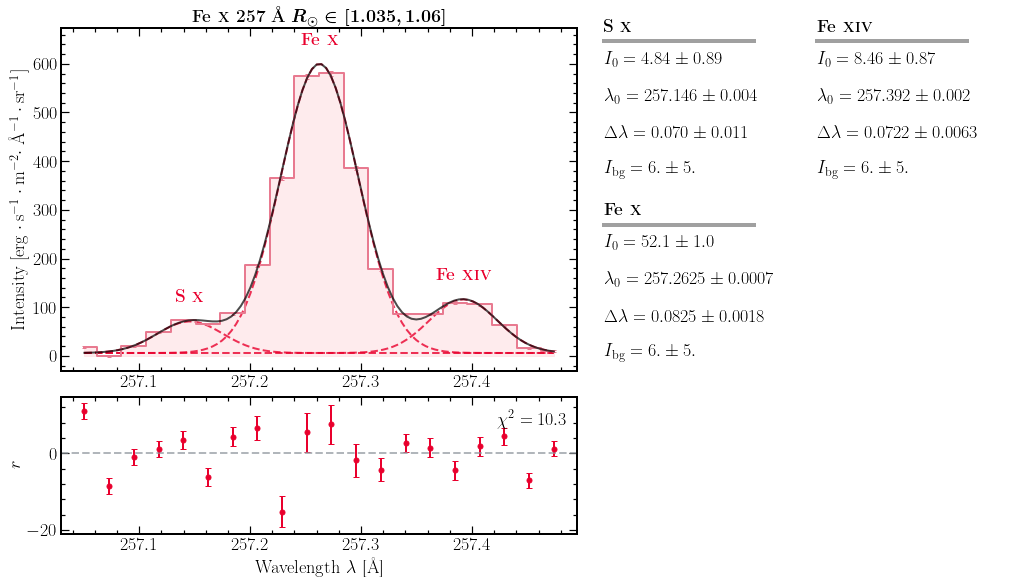

In [69]:
FeX_257_fitmodel_r1 = SpectrumFitSingle(data=FeX_257_data_aver_r1, wvl=FeX_257_wvl,err=FeX_257_err_aver_r1,
                                        line_number=3,line_wvl_init=[257.15,257.25,257.4],int_max_init=[1e2,6e2,1e2],fwhm_init=[0.07,0.07,0.07],
                                        same_width=False)
# FeX_257_fitmodel_r1.plot(plot_fit=False)
FeX_257_fitmodel_r1.run_lse(absolute_sigma=False)
FeX_257_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{x} 257 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        line_caption=[r"\textbf{S \textsc{x}}",r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xiv}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 257 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.06,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

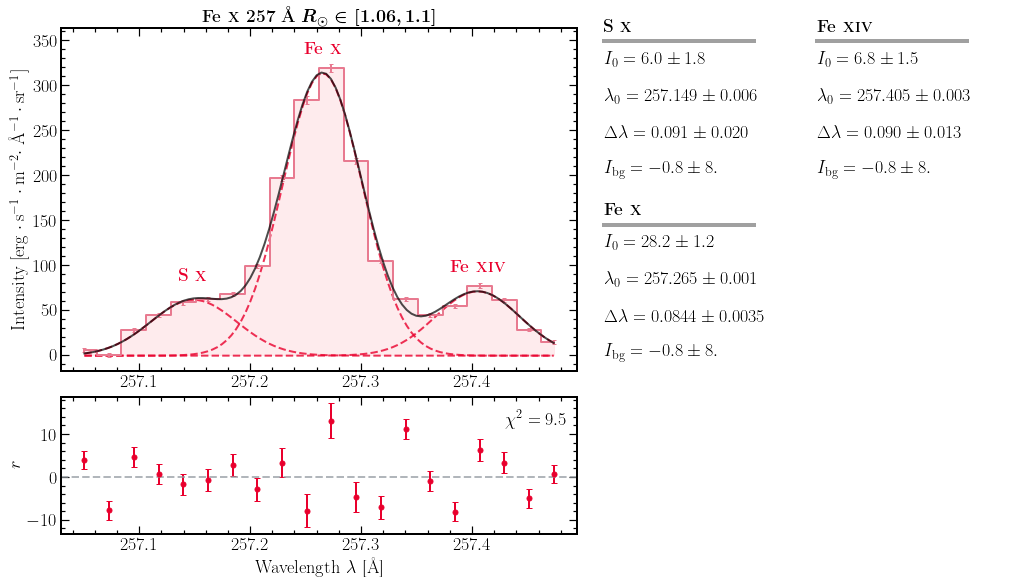

In [70]:
FeX_257_fitmodel_r2 = SpectrumFitSingle(data=FeX_257_data_aver_r2, wvl=FeX_257_wvl,err=FeX_257_err_aver_r2,
                                        line_number=3,line_wvl_init=[257.15,257.25,257.4],int_max_init=[1e2,6e2,1e2],fwhm_init=[0.07,0.07,0.07],
                                        same_width=False)
# FeX_257_fitmodel_r2.plot(plot_fit=False)
FeX_257_fitmodel_r2.run_lse(absolute_sigma=False)
FeX_257_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{x} 257 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        line_caption=[r"\textbf{S \textsc{x}}",r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xiv}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 257 \\mbox{\\AA}} $\\boldsymbol{R_\\odot \\in [1.035,1.1]}$'}, ylabel='Intensity $\\mathrm{[erg\\cdot s^{-1}\\cdot m^{-2}\\cdot}$ \\mbox{\\AA}$\\mathrm{^{-1}\\cdot sr^{-1}]}$'>

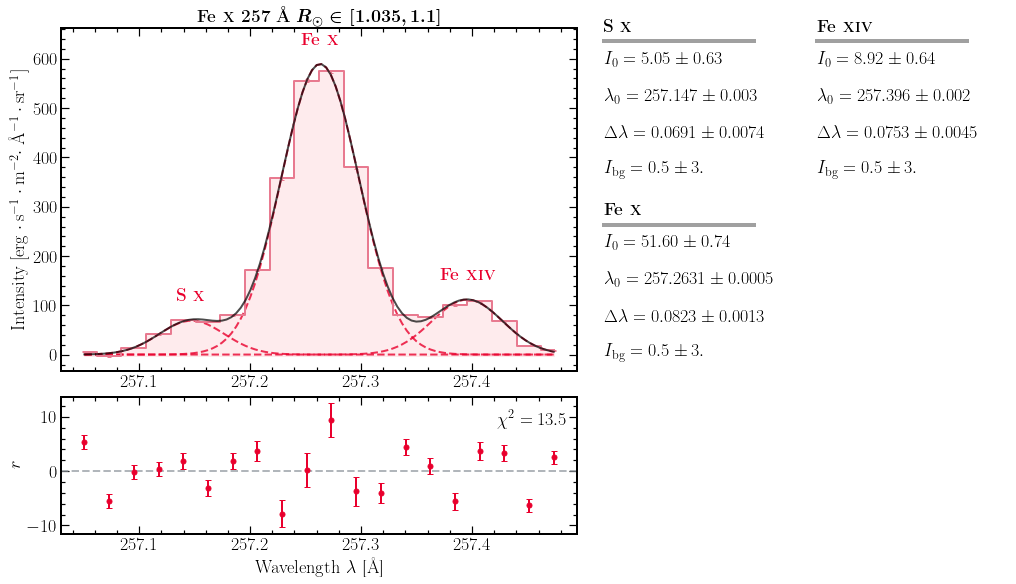

In [71]:
FeX_257_fitmodel_all = SpectrumFitSingle(data=FeX_257_data_aver_all, wvl=FeX_257_wvl,err=FeX_257_err_aver_all,
                                        line_number=3,line_wvl_init=[257.15,257.25,257.4],int_max_init=[1e2,6e2,1e2],fwhm_init=[0.07,0.07,0.07],
                                        same_width=False)
# FeX_257_fitmodel_all.plot(plot_fit=False)
FeX_257_fitmodel_all.run_lse(absolute_sigma=False)
FeX_257_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{x} 257 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        line_caption=[r"\textbf{S \textsc{x}}",r"\textbf{Fe \textsc{x}}",r"\textbf{Fe \textsc{xiv}}"],
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")

In [72]:
SiX_258_slice = slice(550,570)
SiX_258_wvl = wvl_cube_2[SiX_258_slice]

SiX_258_region_1, SiX_258_region_2 = return_mask(np.mean(ccd_offset_0[SiX_258_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

SiX_258_data_region_1 = data_cube_2[SiX_258_region_1[0],SiX_258_region_1[1],SiX_258_slice]
SiX_258_data_region_2 = data_cube_2[SiX_258_region_2[0],SiX_258_region_2[1],SiX_258_slice]
SiX_258_err_region_1 = err_cube_2[SiX_258_region_1[0],SiX_258_region_1[1],SiX_258_slice]
SiX_258_err_region_2 = err_cube_2[SiX_258_region_2[0],SiX_258_region_2[1],SiX_258_slice]

SiX_258_data_aver_r1 = np.nanmean(SiX_258_data_region_1, axis=0)
SiX_258_data_aver_r2 = np.nanmean(SiX_258_data_region_2, axis=0)
SiX_258_data_aver_all = np.nanmean(data_cube_2[:,:,SiX_258_slice], axis=(0,1))

SiX_258_err_aver_r1 = np.sqrt(np.nanmean(SiX_258_err_region_1**2,axis=0))/np.sqrt(SiX_258_err_region_1.shape[0])
SiX_258_err_aver_r2 = np.sqrt(np.nanmean(SiX_258_err_region_2**2,axis=0))/np.sqrt(SiX_258_err_region_2.shape[0])
SiX_258_err_aver_all = np.sqrt(np.nanmean(err_cube_2[:,:,SiX_258_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 49.1 mÅ


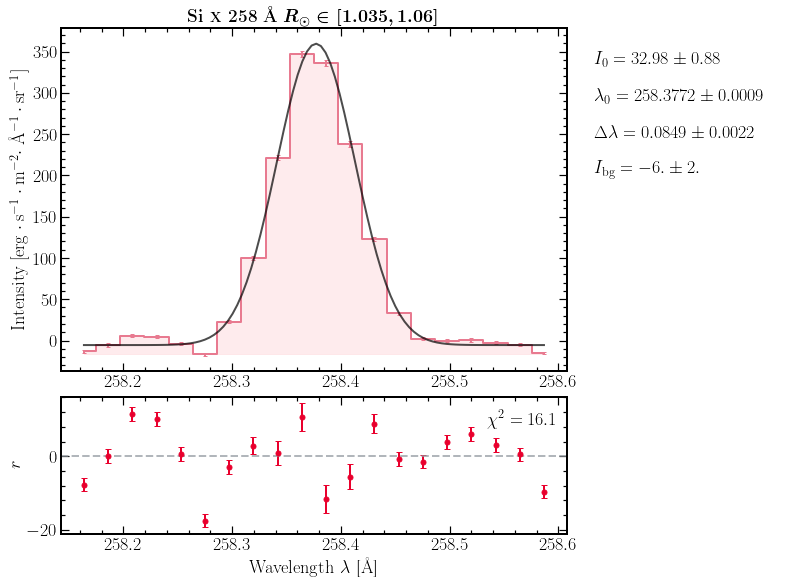

In [73]:
SiX_258_fitmodel_r1 = SpectrumFitSingle(data=SiX_258_data_aver_r1, wvl=SiX_258_wvl,err=SiX_258_err_aver_r1,
                                        line_number=1,line_wvl_init=[258.37],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_258_fitmodel_r1.plot(plot_fit=False)
SiX_258_fitmodel_r1.run_lse(absolute_sigma=False)
SiX_258_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 49.4 mÅ


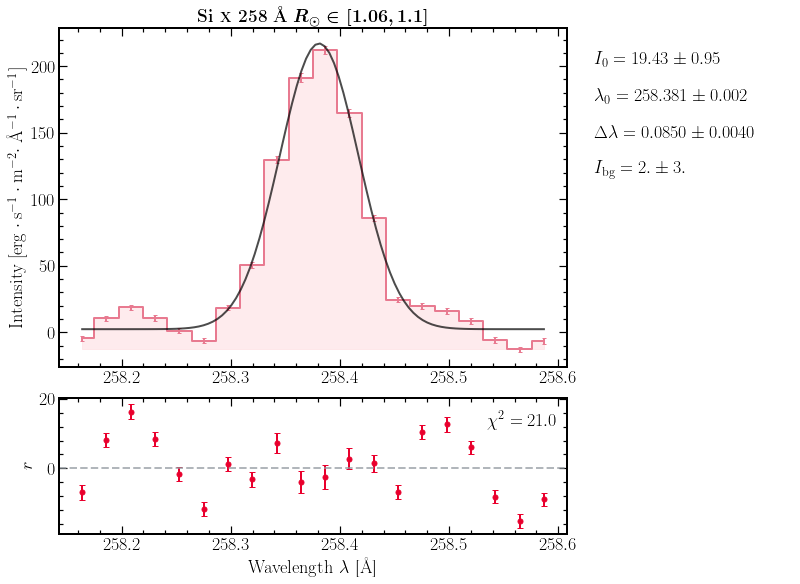

In [74]:
SiX_258_fitmodel_r2 = SpectrumFitSingle(data=SiX_258_data_aver_r2, wvl=SiX_258_wvl,err=SiX_258_err_aver_r2,
                                        line_number=1,line_wvl_init=[258.37],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_258_fitmodel_r2.plot(plot_fit=False)
SiX_258_fitmodel_r2.run_lse(absolute_sigma=False)
SiX_258_fitmodel_r2.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 49.9 mÅ


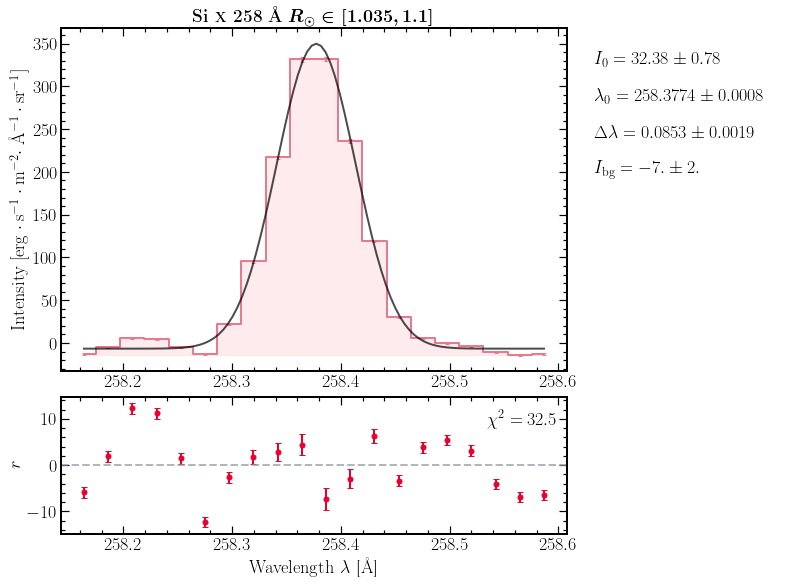

In [75]:
SiX_258_fitmodel_all = SpectrumFitSingle(data=SiX_258_data_aver_all, wvl=SiX_258_wvl,err=SiX_258_err_aver_all,
                                        line_number=1,line_wvl_init=[258.37],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_258_fitmodel_all.plot(plot_fit=False)
SiX_258_fitmodel_all.run_lse(absolute_sigma=False)
SiX_258_fitmodel_all.plot(plot_title=r"\textbf{Si \textsc{x} 258 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_258_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [76]:
SiX_261_slice = slice(670,690)
SiX_261_wvl = wvl_cube_2[SiX_261_slice]

SiX_261_region_1, SiX_261_region_2 = return_mask(np.mean(ccd_offset_0[SiX_261_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

SiX_261_data_region_1 = data_cube_2[SiX_261_region_1[0],SiX_261_region_1[1],SiX_261_slice]
SiX_261_data_region_2 = data_cube_2[SiX_261_region_2[0],SiX_261_region_2[1],SiX_261_slice]
SiX_261_err_region_1 = err_cube_2[SiX_261_region_1[0],SiX_261_region_1[1],SiX_261_slice]
SiX_261_err_region_2 = err_cube_2[SiX_261_region_2[0],SiX_261_region_2[1],SiX_261_slice]

SiX_261_data_aver_r1 = np.nanmean(SiX_261_data_region_1, axis=0)
SiX_261_data_aver_r2 = np.nanmean(SiX_261_data_region_2, axis=0)
SiX_261_data_aver_all = np.nanmean(data_cube_2[:,:,SiX_261_slice], axis=(0,1))

SiX_261_err_aver_r1 = np.sqrt(np.nanmean(SiX_261_err_region_1**2,axis=0))/np.sqrt(SiX_261_err_region_1.shape[0])
SiX_261_err_aver_r2 = np.sqrt(np.nanmean(SiX_261_err_region_2**2,axis=0))/np.sqrt(SiX_261_err_region_2.shape[0])
SiX_261_err_aver_all = np.sqrt(np.nanmean(err_cube_2[:,:,SiX_261_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 47.1 mÅ


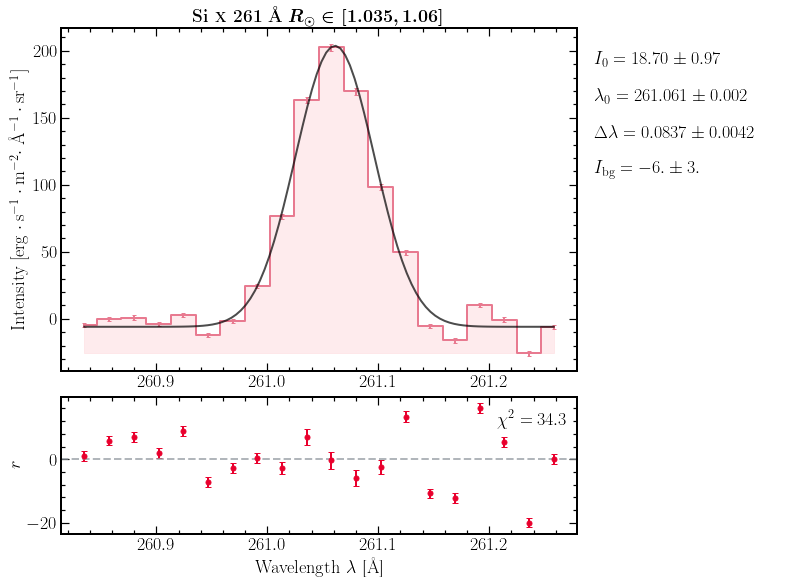

In [77]:
SiX_261_fitmodel_r1 = SpectrumFitSingle(data=SiX_261_data_aver_r1, wvl=SiX_261_wvl,err=SiX_261_err_aver_r1,
                                        line_number=1,line_wvl_init=[261.05],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_261_fitmodel_r1.plot(plot_fit=False)
SiX_261_fitmodel_r1.run_lse(absolute_sigma=False)
SiX_261_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_261_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 54.2 mÅ


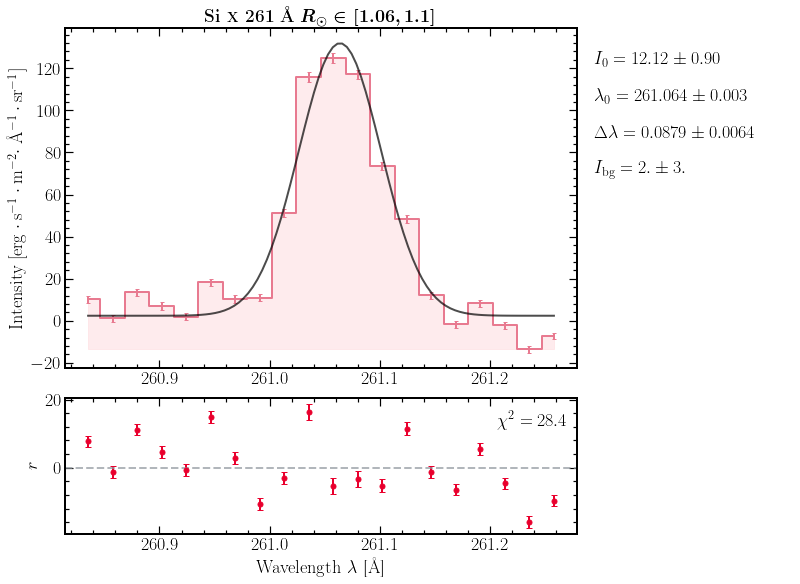

In [78]:
SiX_261_fitmodel_r2 = SpectrumFitSingle(data=SiX_261_data_aver_r2, wvl=SiX_261_wvl,err=SiX_261_err_aver_r2,
                                        line_number=1,line_wvl_init=[261.05],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_261_fitmodel_r2.plot(plot_fit=False)
SiX_261_fitmodel_r2.run_lse(absolute_sigma=False)
SiX_261_fitmodel_r2.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_261_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 47.2 mÅ


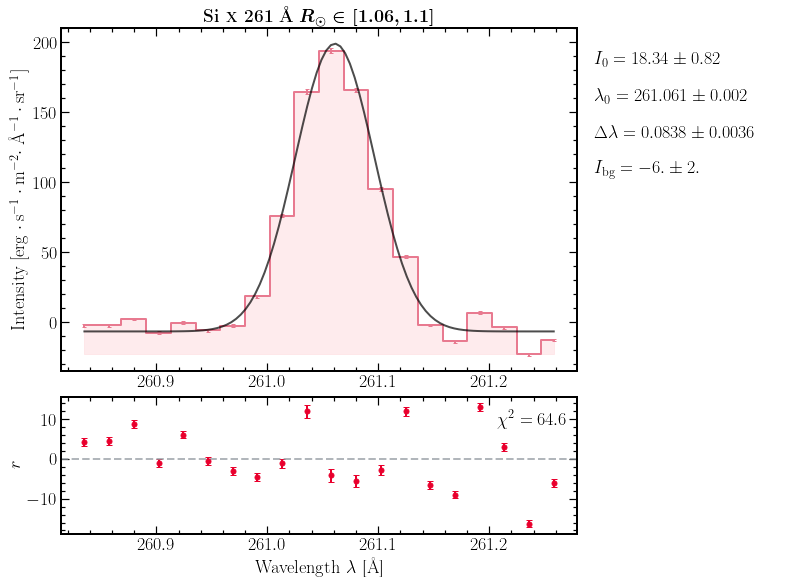

In [79]:
SiX_261_fitmodel_all = SpectrumFitSingle(data=SiX_261_data_aver_all, wvl=SiX_261_wvl,err=SiX_261_err_aver_all,
                                        line_number=1,line_wvl_init=[261.05],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_261_fitmodel_all.plot(plot_fit=False)
SiX_261_fitmodel_all.run_lse(absolute_sigma=False)
SiX_261_fitmodel_all.plot(plot_title=r"\textbf{Si \textsc{x} 261 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_261_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [80]:
SX_264_slice = slice(815,833)
SX_264_wvl = wvl_cube_2[SX_264_slice]

SX_264_region_1, SX_264_region_2 = return_mask(np.mean(ccd_offset_0[SX_264_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

SX_264_data_region_1 = data_cube_2[SX_264_region_1[0],SX_264_region_1[1],SX_264_slice]
SX_264_data_region_2 = data_cube_2[SX_264_region_2[0],SX_264_region_2[1],SX_264_slice]
SX_264_err_region_1 = err_cube_2[SX_264_region_1[0],SX_264_region_1[1],SX_264_slice]
SX_264_err_region_2 = err_cube_2[SX_264_region_2[0],SX_264_region_2[1],SX_264_slice]

SX_264_data_aver_r1 = np.nanmean(SX_264_data_region_1, axis=0)
SX_264_data_aver_r2 = np.nanmean(SX_264_data_region_2, axis=0)
SX_264_data_aver_all = np.nanmean(data_cube_2[:,:,SX_264_slice], axis=(0,1))

SX_264_err_aver_r1 = np.sqrt(np.nanmean(SX_264_err_region_1**2,axis=0))/np.sqrt(SX_264_err_region_1.shape[0])
SX_264_err_aver_r2 = np.sqrt(np.nanmean(SX_264_err_region_2**2,axis=0))/np.sqrt(SX_264_err_region_2.shape[0])
SX_264_err_aver_all = np.sqrt(np.nanmean(err_cube_2[:,:,SX_264_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 51.0 mÅ


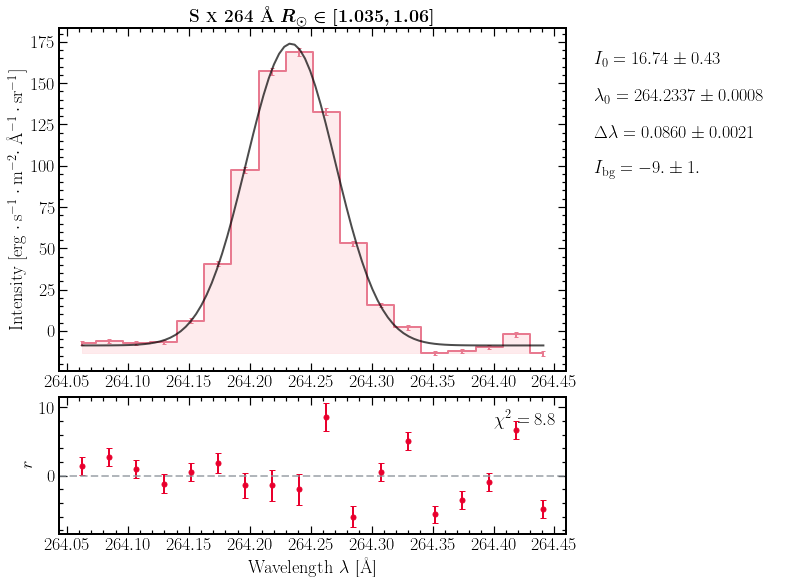

In [81]:
SX_264_fitmodel_r1 = SpectrumFitSingle(data=SX_264_data_aver_r1, wvl=SX_264_wvl,err=SX_264_err_aver_r1,
                                        line_number=1,line_wvl_init=[264.23],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SX_264_fitmodel_r1.plot(plot_fit=False)
SX_264_fitmodel_r1.run_lse(absolute_sigma=False)
SX_264_fitmodel_r1.plot(plot_title=r"\textbf{S \textsc{x} 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SX_264_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 47.9 mÅ


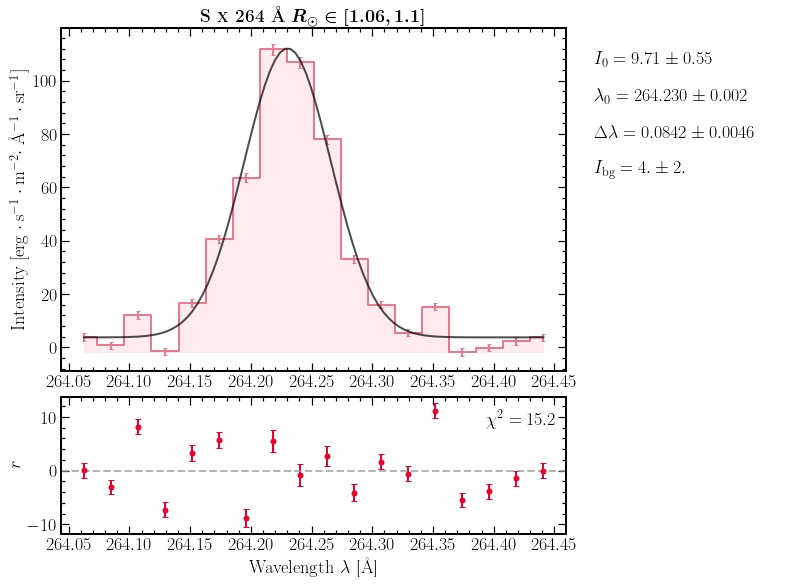

In [82]:
SX_264_fitmodel_r2 = SpectrumFitSingle(data=SX_264_data_aver_r2, wvl=SX_264_wvl,err=SX_264_err_aver_r2,
                                        line_number=1,line_wvl_init=[264.23],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SX_264_fitmodel_r2.plot(plot_fit=False)
SX_264_fitmodel_r2.run_lse(absolute_sigma=False)
SX_264_fitmodel_r2.plot(plot_title=r"\textbf{S \textsc{x} 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SX_264_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 49.7 mÅ


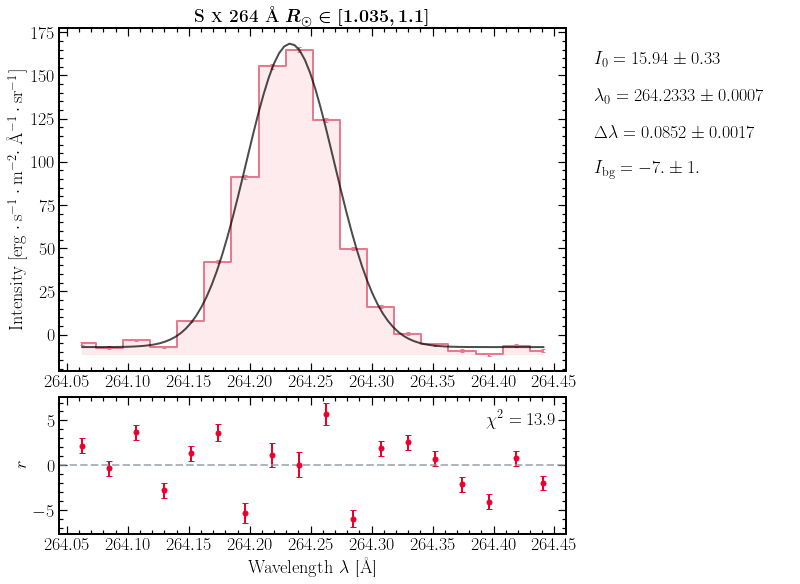

In [83]:
SX_264_fitmodel_all = SpectrumFitSingle(data=SX_264_data_aver_all, wvl=SX_264_wvl,err=SX_264_err_aver_all,
                                        line_number=1,line_wvl_init=[264.23],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SX_264_fitmodel_all.plot(plot_fit=False)
SX_264_fitmodel_all.run_lse(absolute_sigma=False)
SX_264_fitmodel_all.plot(plot_title=r"\textbf{S \textsc{x} 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SX_264_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [84]:
FeXIV_264_slice = slice(840,855)
FeXIV_264_wvl = wvl_cube_2[FeXIV_264_slice]

FeXIV_264_region_1, FeXIV_264_region_2 = return_mask(np.mean(ccd_offset_0[FeXIV_264_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXIV_264_data_region_1 = data_cube_2[FeXIV_264_region_1[0],FeXIV_264_region_1[1],FeXIV_264_slice]
FeXIV_264_data_region_2 = data_cube_2[FeXIV_264_region_2[0],FeXIV_264_region_2[1],FeXIV_264_slice]
FeXIV_264_err_region_1 = err_cube_2[FeXIV_264_region_1[0],FeXIV_264_region_1[1],FeXIV_264_slice]
FeXIV_264_err_region_2 = err_cube_2[FeXIV_264_region_2[0],FeXIV_264_region_2[1],FeXIV_264_slice]

FeXIV_264_data_aver_r1 = np.nanmean(FeXIV_264_data_region_1, axis=0)
FeXIV_264_data_aver_r2 = np.nanmean(FeXIV_264_data_region_2, axis=0)
FeXIV_264_data_aver_all = np.nanmean(data_cube_2[:,:,FeXIV_264_slice], axis=(0,1))

FeXIV_264_err_aver_r1 = np.sqrt(np.nanmean(FeXIV_264_err_region_1**2,axis=0))/np.sqrt(FeXIV_264_err_region_1.shape[0])
FeXIV_264_err_aver_r2 = np.sqrt(np.nanmean(FeXIV_264_err_region_2**2,axis=0))/np.sqrt(FeXIV_264_err_region_2.shape[0])
FeXIV_264_err_aver_all = np.sqrt(np.nanmean(err_cube_2[:,:,FeXIV_264_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 43.9 mÅ


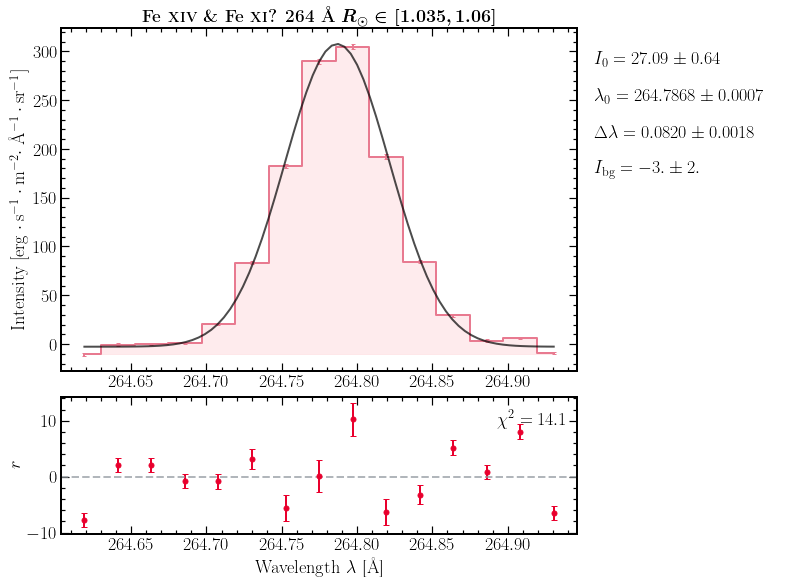

In [85]:
FeXIV_264_fitmodel_r1 = SpectrumFitSingle(data=FeXIV_264_data_aver_r1, wvl=FeXIV_264_wvl,err=FeXIV_264_err_aver_r1,
                                        line_number=1,line_wvl_init=[264.79],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_264_fitmodel_r1.plot(plot_fit=False)
FeXIV_264_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIV_264_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiv} \& Fe \textsc{xi}? 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_264_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 49.6 mÅ


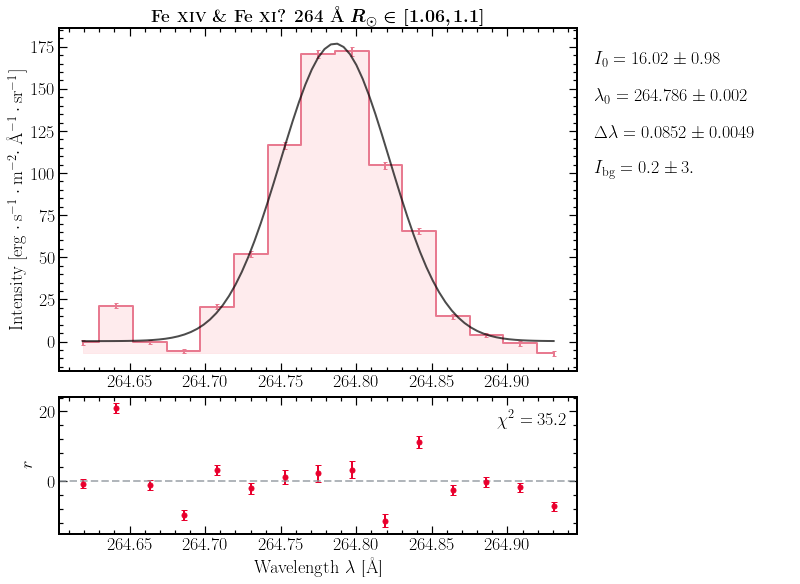

In [86]:
FeXIV_264_fitmodel_r2 = SpectrumFitSingle(data=FeXIV_264_data_aver_r2, wvl=FeXIV_264_wvl,err=FeXIV_264_err_aver_r2,
                                        line_number=1,line_wvl_init=[264.79],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_264_fitmodel_r2.plot(plot_fit=False)
FeXIV_264_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIV_264_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiv} \& Fe \textsc{xi}? 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_264_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 44.6 mÅ


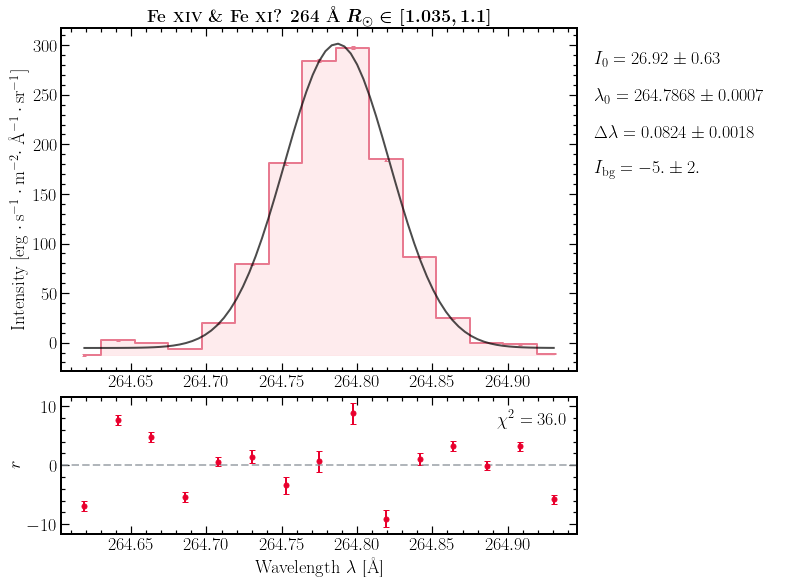

In [87]:
FeXIV_264_fitmodel_all = SpectrumFitSingle(data=FeXIV_264_data_aver_all, wvl=FeXIV_264_wvl,err=FeXIV_264_err_aver_all,
                                        line_number=1,line_wvl_init=[264.79],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_264_fitmodel_all.plot(plot_fit=False)
FeXIV_264_fitmodel_all.run_lse(absolute_sigma=False)
FeXIV_264_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xiv} \& Fe \textsc{xi}? 264 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_264_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [88]:
FeXIV_270_slice = slice(72,95)
FeXIV_270_wvl = wvl_cube_3[FeXIV_270_slice]

FeXIV_270_region_1, FeXIV_270_region_2 = return_mask(np.mean(ccd_offset_0[FeXIV_270_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXIV_270_data_region_1 = data_cube_3[FeXIV_270_region_1[0],FeXIV_270_region_1[1],FeXIV_270_slice]
FeXIV_270_data_region_2 = data_cube_3[FeXIV_270_region_2[0],FeXIV_270_region_2[1],FeXIV_270_slice]
FeXIV_270_err_region_1 = err_cube_3[FeXIV_270_region_1[0],FeXIV_270_region_1[1],FeXIV_270_slice]
FeXIV_270_err_region_2 = err_cube_3[FeXIV_270_region_2[0],FeXIV_270_region_2[1],FeXIV_270_slice]

FeXIV_270_data_aver_r1 = np.nanmean(FeXIV_270_data_region_1, axis=0)
FeXIV_270_data_aver_r2 = np.nanmean(FeXIV_270_data_region_2, axis=0)
FeXIV_270_data_aver_all = np.nanmean(data_cube_3[:,:,FeXIV_270_slice], axis=(0,1))

FeXIV_270_err_aver_r1 = np.sqrt(np.nanmean(FeXIV_270_err_region_1**2,axis=0))/np.sqrt(FeXIV_270_err_region_1.shape[0])
FeXIV_270_err_aver_r2 = np.sqrt(np.nanmean(FeXIV_270_err_region_2**2,axis=0))/np.sqrt(FeXIV_270_err_region_2.shape[0])
FeXIV_270_err_aver_all = np.sqrt(np.nanmean(err_cube_3[:,:,FeXIV_270_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 45.3 mÅ


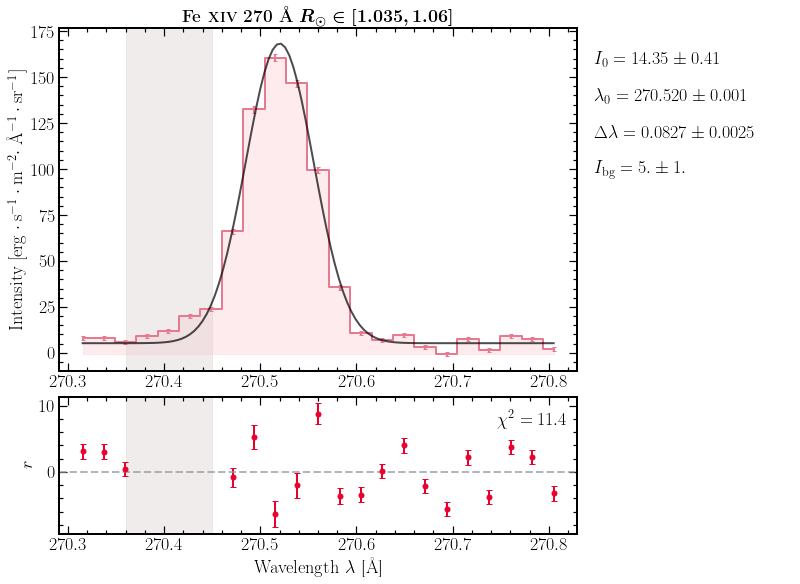

In [89]:
FeXIV_270_fitmodel_r1 = SpectrumFitSingle(data=FeXIV_270_data_aver_r1, wvl=FeXIV_270_wvl,err=FeXIV_270_err_aver_r1,
                                        line_number=1,line_wvl_init=[270.52],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[270.36,270.45]])
# FeXIV_270_fitmodel_r1.plot(plot_fit=False)
FeXIV_270_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIV_270_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiv} 270 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_270_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 43.9 mÅ


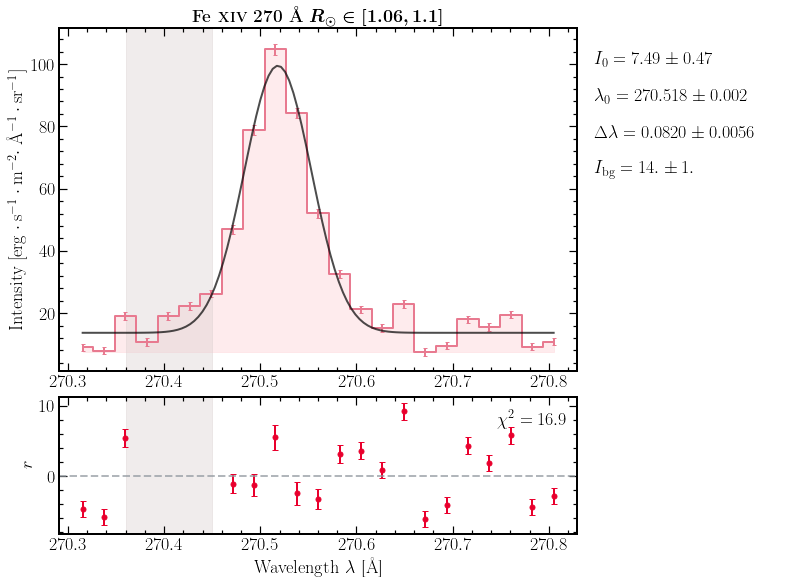

In [90]:
FeXIV_270_fitmodel_r2 = SpectrumFitSingle(data=FeXIV_270_data_aver_r2, wvl=FeXIV_270_wvl,err=FeXIV_270_err_aver_r2,
                                        line_number=1,line_wvl_init=[270.52],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[270.36,270.45]])
# FeXIV_270_fitmodel_r2.plot(plot_fit=False)
FeXIV_270_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIV_270_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiv} 270 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_270_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 44.1 mÅ


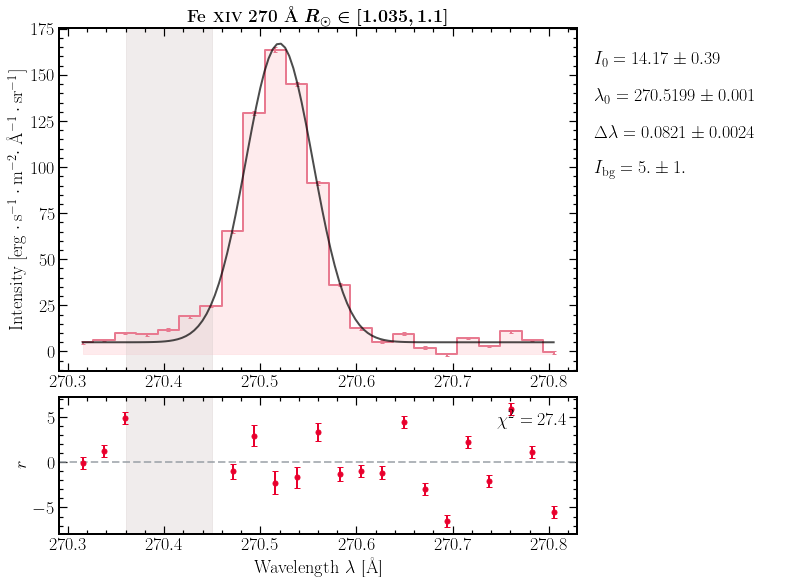

In [91]:
FeXIV_270_fitmodel_all = SpectrumFitSingle(data=FeXIV_270_data_aver_all, wvl=FeXIV_270_wvl,err=FeXIV_270_err_aver_all,
                                        line_number=1,line_wvl_init=[270.52],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[270.36,270.45]])
# FeXIV_270_fitmodel_all.plot(plot_fit=False)
FeXIV_270_fitmodel_all.run_lse(absolute_sigma=False)
FeXIV_270_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xiv} 270 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_270_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [92]:
SiX_271_slice = slice(140,157)
SiX_271_wvl = wvl_cube_3[SiX_271_slice]

SiX_271_region_1, SiX_271_region_2 = return_mask(np.mean(ccd_offset_0[SiX_271_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

SiX_271_data_region_1 = data_cube_3[SiX_271_region_1[0],SiX_271_region_1[1],SiX_271_slice]
SiX_271_data_region_2 = data_cube_3[SiX_271_region_2[0],SiX_271_region_2[1],SiX_271_slice]
SiX_271_err_region_1 = err_cube_3[SiX_271_region_1[0],SiX_271_region_1[1],SiX_271_slice]
SiX_271_err_region_2 = err_cube_3[SiX_271_region_2[0],SiX_271_region_2[1],SiX_271_slice]

SiX_271_data_aver_r1 = np.nanmean(SiX_271_data_region_1, axis=0)
SiX_271_data_aver_r2 = np.nanmean(SiX_271_data_region_2, axis=0)
SiX_271_data_aver_all = np.nanmean(data_cube_3[:,:,SiX_271_slice], axis=(0,1))

SiX_271_err_aver_r1 = np.sqrt(np.nanmean(SiX_271_err_region_1**2,axis=0))/np.sqrt(SiX_271_err_region_1.shape[0])
SiX_271_err_aver_r2 = np.sqrt(np.nanmean(SiX_271_err_region_2**2,axis=0))/np.sqrt(SiX_271_err_region_2.shape[0])
SiX_271_err_aver_all = np.sqrt(np.nanmean(err_cube_3[:,:,SiX_271_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 43.1 mÅ


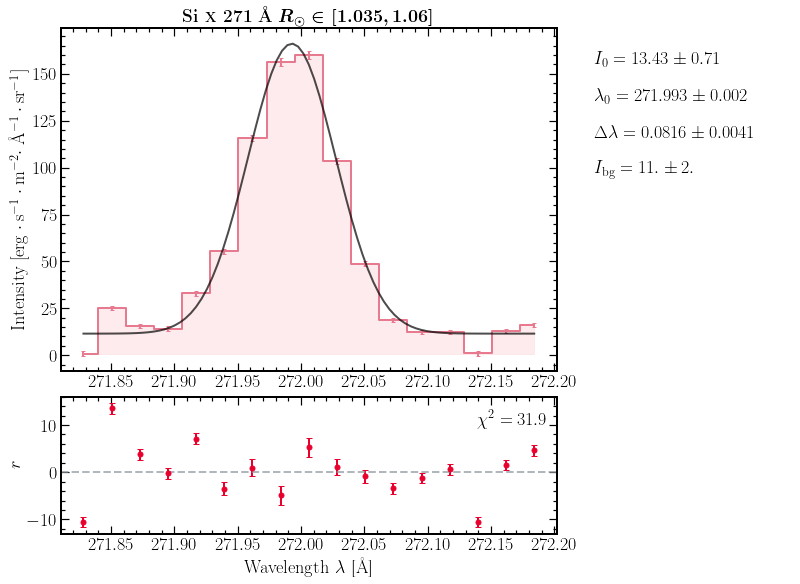

In [93]:
SiX_271_fitmodel_r1 = SpectrumFitSingle(data=SiX_271_data_aver_r1, wvl=SiX_271_wvl,err=SiX_271_err_aver_r1,
                                        line_number=1,line_wvl_init=[271.99],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_271_fitmodel_r1.plot(plot_fit=False)
SiX_271_fitmodel_r1.run_lse(absolute_sigma=False)
SiX_271_fitmodel_r1.plot(plot_title=r"\textbf{Si \textsc{x} 271 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_271_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 32.5 mÅ


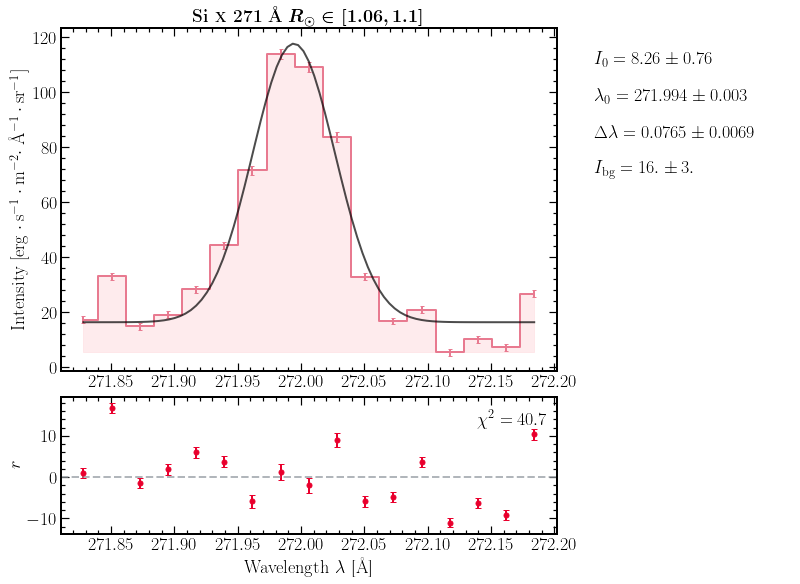

In [94]:
SiX_271_fitmodel_r2 = SpectrumFitSingle(data=SiX_271_data_aver_r2, wvl=SiX_271_wvl,err=SiX_271_err_aver_r2,
                                        line_number=1,line_wvl_init=[271.99],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_271_fitmodel_r2.plot(plot_fit=False)
SiX_271_fitmodel_r2.run_lse(absolute_sigma=False)
SiX_271_fitmodel_r2.plot(plot_title=r"\textbf{Si \textsc{x} 271 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_271_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 40.8 mÅ


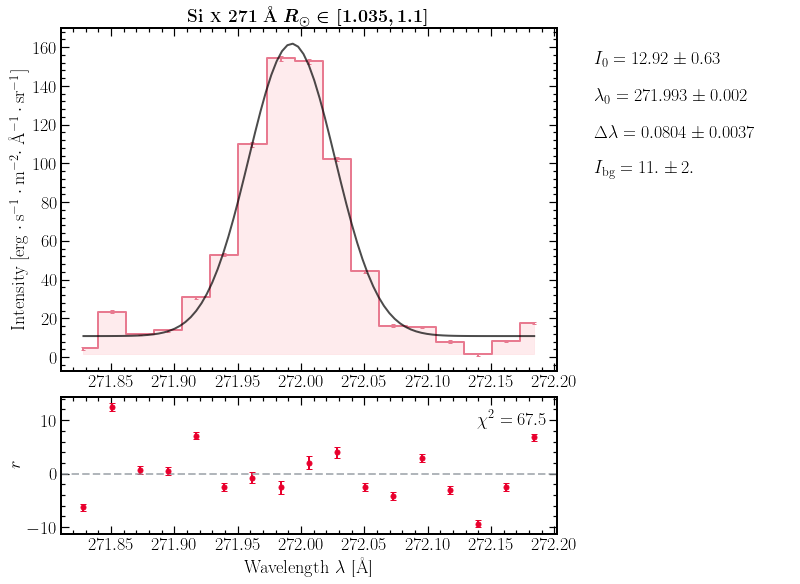

In [95]:
SiX_271_fitmodel_all = SpectrumFitSingle(data=SiX_271_data_aver_all, wvl=SiX_271_wvl,err=SiX_271_err_aver_all,
                                        line_number=1,line_wvl_init=[271.99],int_max_init=[1e2],fwhm_init=[0.07],
                                        same_width=False)
# SiX_271_fitmodel_all.plot(plot_fit=False)
SiX_271_fitmodel_all.run_lse(absolute_sigma=False)
SiX_271_fitmodel_all.plot(plot_title=r"\textbf{Si \textsc{x} 271 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(SiX_271_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [102]:
FeXIV_274_slice = slice(240,255)
FeXIV_274_wvl = wvl_cube_3[FeXIV_274_slice]

FeXIV_274_region_1, FeXIV_274_region_2 = return_mask(np.mean(ccd_offset_0[FeXIV_274_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXIV_274_data_region_1 = data_cube_3[FeXIV_274_region_1[0],FeXIV_274_region_1[1],FeXIV_274_slice]
FeXIV_274_data_region_2 = data_cube_3[FeXIV_274_region_2[0],FeXIV_274_region_2[1],FeXIV_274_slice]
FeXIV_274_err_region_1 = err_cube_3[FeXIV_274_region_1[0],FeXIV_274_region_1[1],FeXIV_274_slice]
FeXIV_274_err_region_2 = err_cube_3[FeXIV_274_region_2[0],FeXIV_274_region_2[1],FeXIV_274_slice]

FeXIV_274_data_aver_r1 = np.nanmean(FeXIV_274_data_region_1, axis=0)
FeXIV_274_data_aver_r2 = np.nanmean(FeXIV_274_data_region_2, axis=0)
FeXIV_274_data_aver_all = np.nanmean(data_cube_3[:,:,FeXIV_274_slice], axis=(0,1))

FeXIV_274_err_aver_r1 = np.sqrt(np.nanmean(FeXIV_274_err_region_1**2,axis=0))/np.sqrt(FeXIV_274_err_region_1.shape[0])
FeXIV_274_err_aver_r2 = np.sqrt(np.nanmean(FeXIV_274_err_region_2**2,axis=0))/np.sqrt(FeXIV_274_err_region_2.shape[0])
FeXIV_274_err_aver_all = np.sqrt(np.nanmean(err_cube_3[:,:,FeXIV_274_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 49.6 mÅ


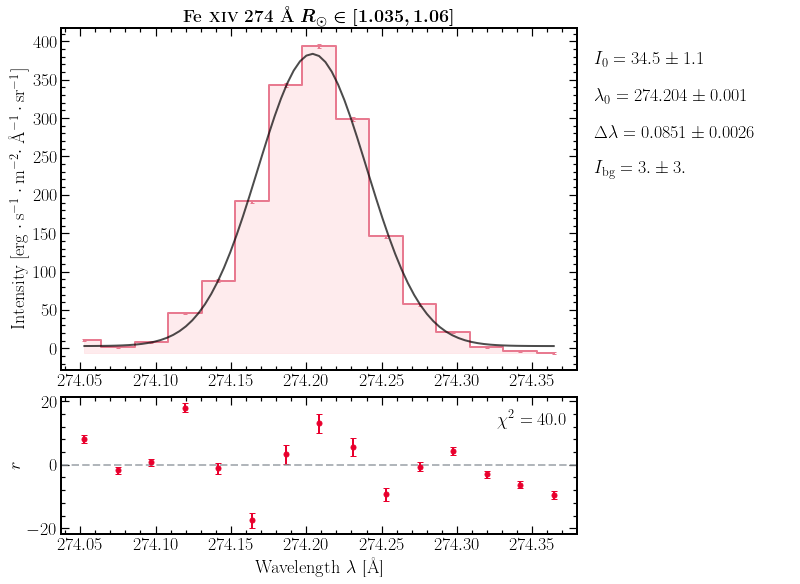

In [105]:
FeXIV_274_fitmodel_r1 = SpectrumFitSingle(data=FeXIV_274_data_aver_r1, wvl=FeXIV_274_wvl,err=FeXIV_274_err_aver_r1,
                                        line_number=1,line_wvl_init=[274.2],int_max_init=[4e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_274_fitmodel_r1.plot(plot_fit=False)
FeXIV_274_fitmodel_r1.run_lse(absolute_sigma=False)
FeXIV_274_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xiv} 274 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_274_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 51.0 mÅ


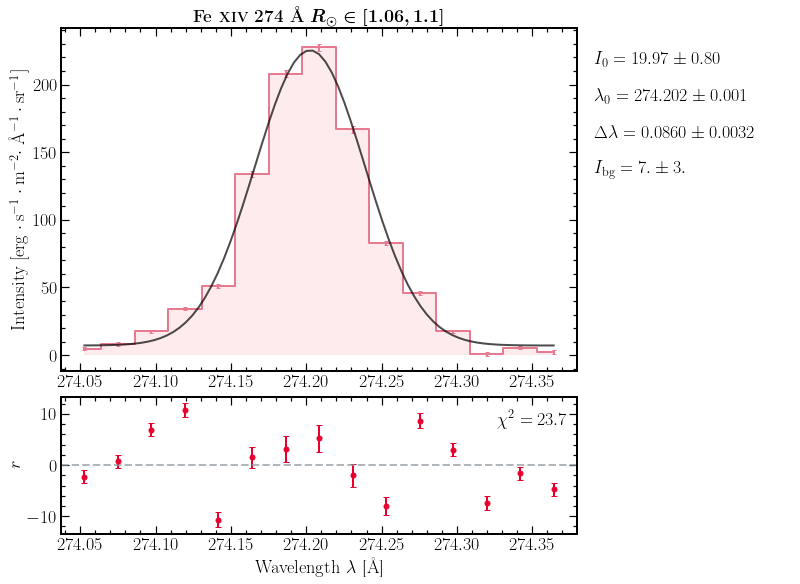

In [106]:
FeXIV_274_fitmodel_r2 = SpectrumFitSingle(data=FeXIV_274_data_aver_r2, wvl=FeXIV_274_wvl,err=FeXIV_274_err_aver_r2,
                                        line_number=1,line_wvl_init=[274.2],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_274_fitmodel_r2.plot(plot_fit=False)
FeXIV_274_fitmodel_r2.run_lse(absolute_sigma=False)
FeXIV_274_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xiv} 274 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_274_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 48.2 mÅ


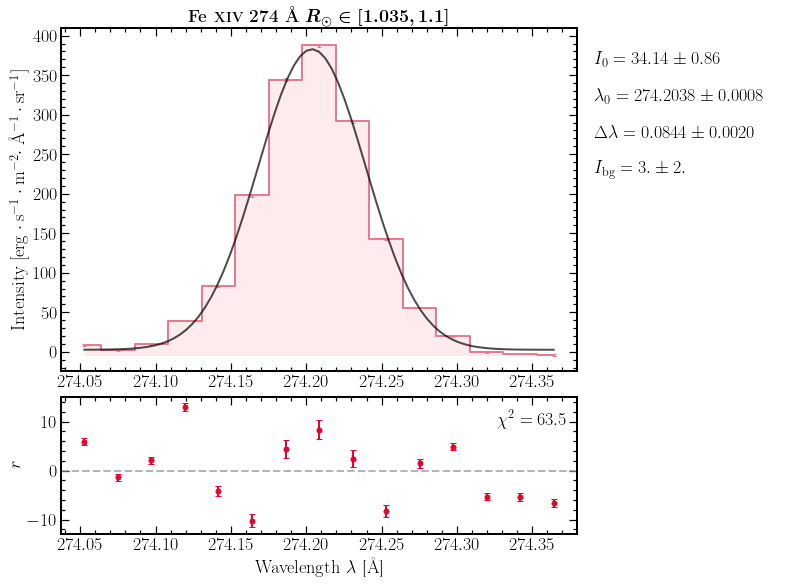

In [107]:
FeXIV_274_fitmodel_all = SpectrumFitSingle(data=FeXIV_274_data_aver_all, wvl=FeXIV_274_wvl,err=FeXIV_274_err_aver_all,
                                        line_number=1,line_wvl_init=[274.2],int_max_init=[2e2],fwhm_init=[0.07],
                                        same_width=False)
# FeXIV_274_fitmodel_all.plot(plot_fit=False)
FeXIV_274_fitmodel_all.run_lse(absolute_sigma=False)
FeXIV_274_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xiv} 274 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXIV_274_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

In [118]:
FeXV_284_slice = slice(680,705)
FeXV_284_wvl = wvl_cube_3[FeXV_284_slice]

FeXV_284_region_1, FeXV_284_region_2 = return_mask(np.mean(ccd_offset_0[FeXV_284_slice]), ccd_offset_FeXII, fexii_195_bottom_left)

FeXV_284_data_region_1 = data_cube_3[FeXV_284_region_1[0],FeXV_284_region_1[1],FeXV_284_slice]
FeXV_284_data_region_2 = data_cube_3[FeXV_284_region_2[0],FeXV_284_region_2[1],FeXV_284_slice]
FeXV_284_err_region_1 = err_cube_3[FeXV_284_region_1[0],FeXV_284_region_1[1],FeXV_284_slice]
FeXV_284_err_region_2 = err_cube_3[FeXV_284_region_2[0],FeXV_284_region_2[1],FeXV_284_slice]

FeXV_284_data_aver_r1 = np.nanmean(FeXV_284_data_region_1, axis=0)
FeXV_284_data_aver_r2 = np.nanmean(FeXV_284_data_region_2, axis=0)
FeXV_284_data_aver_all = np.nanmean(data_cube_3[:,:,FeXV_284_slice], axis=(0,1))

FeXV_284_err_aver_r1 = np.sqrt(np.nanmean(FeXV_284_err_region_1**2,axis=0))/np.sqrt(FeXV_284_err_region_1.shape[0])
FeXV_284_err_aver_r2 = np.sqrt(np.nanmean(FeXV_284_err_region_2**2,axis=0))/np.sqrt(FeXV_284_err_region_2.shape[0])
FeXV_284_err_aver_all = np.sqrt(np.nanmean(err_cube_3[:,:,FeXV_284_slice]**2,axis=(0,1)))/np.sqrt(160*16)

Corrected line width 41.1 mÅ


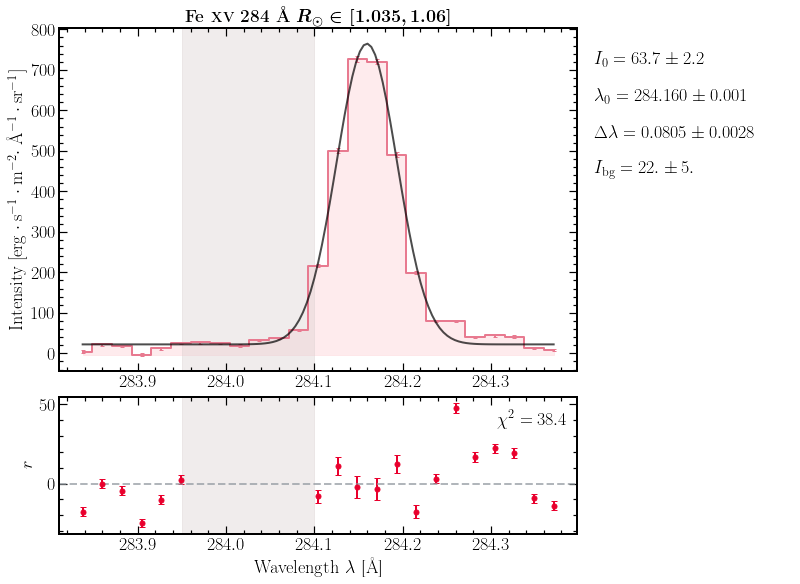

In [124]:
FeXV_284_fitmodel_r1 = SpectrumFitSingle(data=FeXV_284_data_aver_r1, wvl=FeXV_284_wvl,err=FeXV_284_err_aver_r1,
                                        line_number=1,line_wvl_init=[284.16],int_max_init=[4e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[283.95,284.1]])
# FeXV_284_fitmodel_r1.plot(plot_fit=False)
FeXV_284_fitmodel_r1.run_lse(absolute_sigma=False)
FeXV_284_fitmodel_r1.plot(plot_title=r"\textbf{Fe \textsc{xv} 284 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.06]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXV_284_fitmodel_r1.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 31.1 mÅ


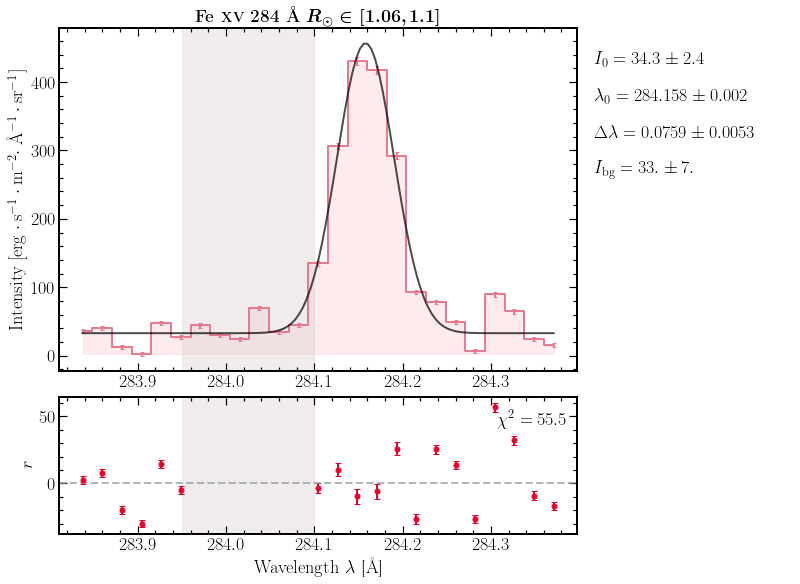

In [125]:
FeXV_284_fitmodel_r2 = SpectrumFitSingle(data=FeXV_284_data_aver_r2, wvl=FeXV_284_wvl,err=FeXV_284_err_aver_r2,
                                        line_number=1,line_wvl_init=[284.16],int_max_init=[4e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[283.95,284.1]])
# FeXV_284_fitmodel_r2.plot(plot_fit=False)
FeXV_284_fitmodel_r2.run_lse(absolute_sigma=False)
FeXV_284_fitmodel_r2.plot(plot_title=r"\textbf{Fe \textsc{xv} 284 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.06,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXV_284_fitmodel_r2.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))

Corrected line width 41.0 mÅ


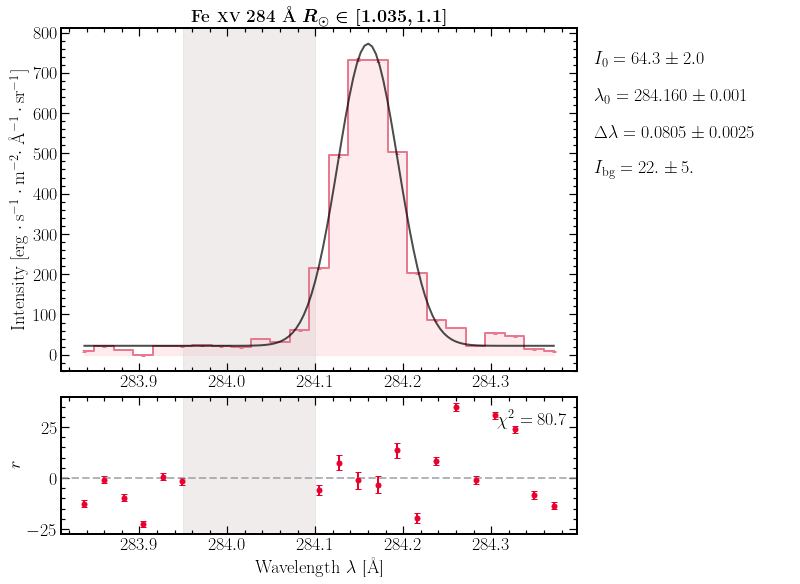

In [126]:
FeXV_284_fitmodel_all = SpectrumFitSingle(data=FeXV_284_data_aver_all, wvl=FeXV_284_wvl,err=FeXV_284_err_aver_all,
                                        line_number=1,line_wvl_init=[284.16],int_max_init=[4e2],fwhm_init=[0.07],
                                        same_width=False,mask=[[283.95,284.1]])
# FeXV_284_fitmodel_all.plot(plot_fit=False)
FeXV_284_fitmodel_all.run_lse(absolute_sigma=False)
FeXV_284_fitmodel_all.plot(plot_title=r"\textbf{Fe \textsc{xv} 284 \mbox{\AA}} $\boldsymbol{R_\odot \in [1.035,1.1]}$",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("Corrected line width {:.1f} mÅ".format(np.sqrt(FeXV_284_fitmodel_all.fwhm_fit[0]**2 - slit_width_aver**2)*1e3))